# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

# Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

# Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

# About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

**You are provided with following 2 files:**

**1. train.csv :** Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

**2.   test.csv :** Use the trained model to predict whether a new set of clients will subscribe the term deposit.    

# Dataset Attributes

Here is the description of all the variables:
    
• Variable: Definition

• ID: Unique client ID

• age: Age of the client

• job: Type of job

• marital: Marital status of the client

• education: Education level

• default: Credit in default.

• housing: Housing loan

• loan: Personal loan

• contact: Type of communication

• month: Contact month

• day_of_week: Day of week of contact

• duration: Contact duration

• campaign: number of contacts performed during this campaign to the client

• pdays: number of days that passed by after the client was last contacted

• previous: number of contacts performed before this campaign

• poutcome: outcome of the previous marketing campaign

# Output variable (desired target):

**• Subscribed (target):** has the client subscribed a term deposit? (YES/NO)

# Dataset Link-

• https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
    
• https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
    
• https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv
    


# Answer:-

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [39]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Exploratory Data Analysis(EDA)

In [40]:
#Checking Dimension of the data
df.shape

(31647, 18)

**Here you can see in this dataset 31647 rows are present and 18 columns are present.**

In [41]:
#Checking for all column names
df.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [42]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


**Observation:-**
    
1) There is no null value present in Dataset.

2) There are 8 columns that have Integer values and 10 columns those have String values.

3) <class 'pandas.core.frame.DataFrame'> indecates that we are checking the info of a PANDAS DataFrame.

4) This DataFarme occupy 4.3+ MB of memory.

In [43]:
#Checking for duplicate row
df.duplicated().sum()

0

**So you can see in the dataset there is no duplicate row present.**

In [44]:
#Separately checking datatypes of all columns
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

**You can see there are 8 columns that have Integer values and 10 columns those have String values.**

In [45]:
#Checking null values columnwise
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

**There is no null value present in any column.**

<Axes: >

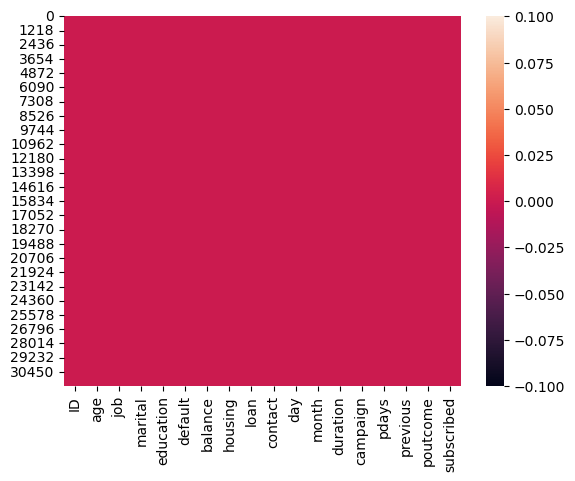

In [46]:
#Checking null value using heatmap
sns.heatmap(df.isnull())

**No null value is present.**

In [47]:
#Checking value counts for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")
    

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

**Observation:-** 
    
1) Here subscribed is our Target column and you can see there is a hugh difference between this column's data counts with it's unique value count.Like this column has 31647 values and it has only 2 unique values Yes and No,so it's clear that this problem is a classification problem.

2) In subscribed column there are 27932 counts for no and 3715 for yes so there is class imbalance issue and we can solve this problem with SMOTH in the later part.

3) Here ID column we can delete because it will not help us for our prediction.

4) For default column there is less defaulters that is good for banks.

In [48]:
#Checking unique values for each column
df.nunique().to_frame("Unique value counts")

,Unique value counts
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


**Observation:-**
    
1) Apart form ID,balance,duration,pdays these columns most columns have less unique values.So we can consider most of the columns have the categorical data.

2) Also we can see our Target column has only 2 unique values.

In [49]:
#Checking discription of the dataset
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Observation:-**
    
1) Here we can see those columns which has numerical data we can see their statstical view.

2) There is a huge difference between 75% and max for age,balance,day,duration,campaign,pdays,previous these columns so in these columnns outliers may present.

3) Here age,balance,duration,campaign,pdays and previous columns have greater mean that median(50%) that means these columns are right skewed.

4) Only day column is left skewed.

**As we all know we dont need ID column so I will delete that column.Let delete it:**

In [50]:
#Deleting ID column
df.drop("ID",axis=1,inplace=True)

In [51]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no


**Now we can see ID column is deleted.**

# Data Visualization:-

**Univariate Analysis**

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'blue-collar'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'student'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'unemployed')])

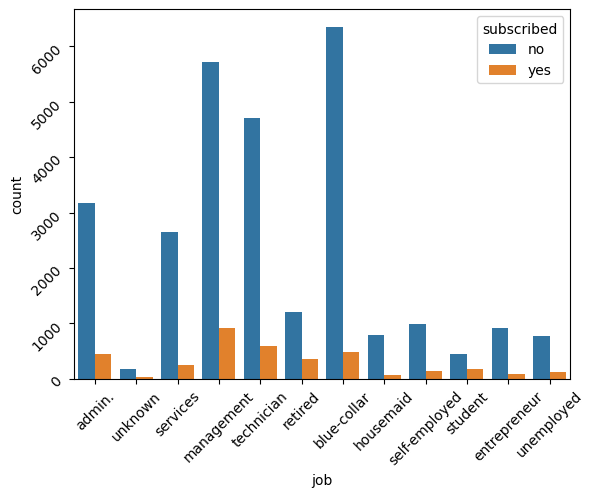

In [52]:
print(df["job"].value_counts())
sns.countplot(x="job",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Observation:-**
    
*1) In our dataset most of the people working on blue-collar and management job these people are highly avoid the term deposit subscription.*

*2) And by checking all job categories those who are working in management job are taking more term deposit subscription than any other job person.*

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'married'), Text(1, 0, 'divorced'), Text(2, 0, 'single')])

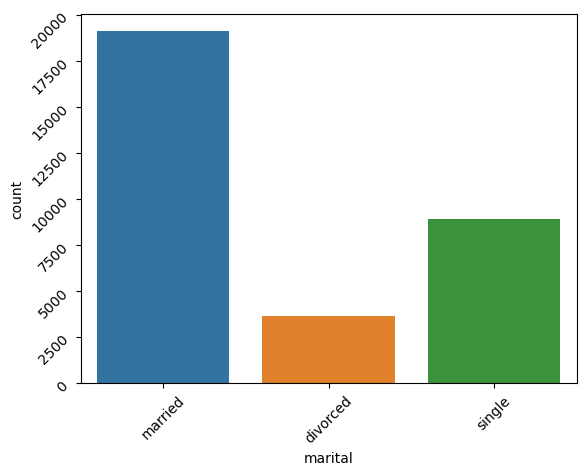

In [53]:
print(df["marital"].value_counts())
sns.countplot(x="marital",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Here you can see married persons count is higest then the single and divorced person.**

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'married'), Text(1, 0, 'divorced'), Text(2, 0, 'single')])

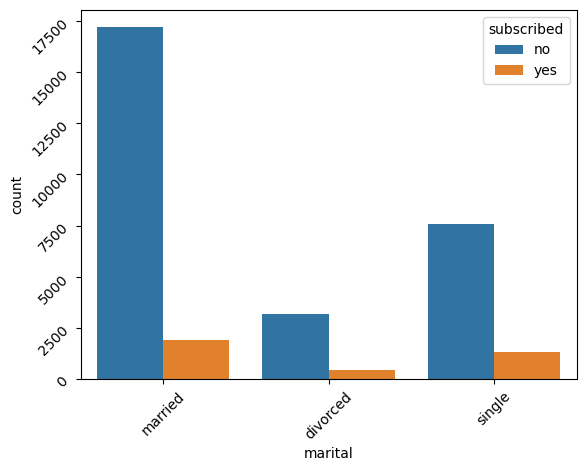

In [54]:
#Visualizing marital column data according to our Target column 
print(df["marital"].value_counts())
sns.countplot(x="marital",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Those persons who are married and Single they subscribe term deposit more than divorceed person.Accoding to the ratio we can see Single persons are having good ration of taking term deposit subcription.**

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'secondary'),
  Text(2, 0, 'tertiary'),
  Text(3, 0, 'primary')])

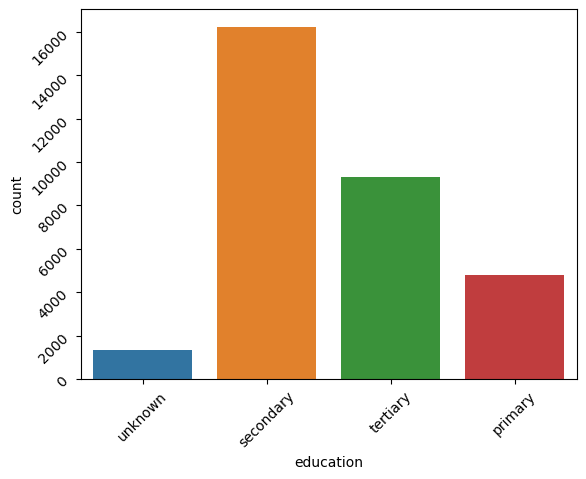

In [55]:
print(df["education"].value_counts())
sns.countplot(x="education",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**So here we can see the most of the person have secondary education and very less people those education label is unknown.**

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'secondary'),
  Text(2, 0, 'tertiary'),
  Text(3, 0, 'primary')])

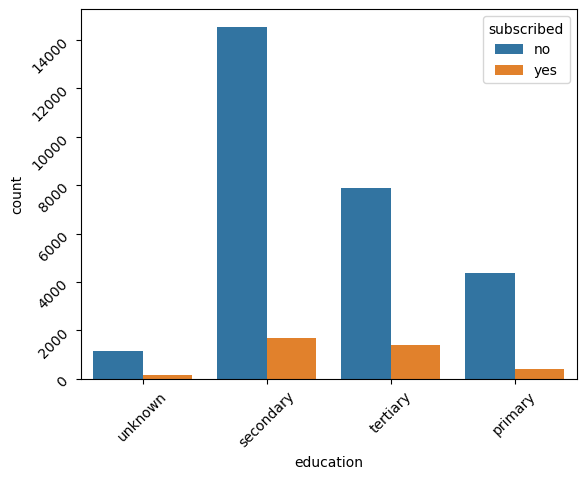

In [56]:
#Visualizing education column data according to our Target column 
print(df["education"].value_counts())
sns.countplot(x="education",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Here we can see those person who having secondary education and who have tertiary education those people are subscribe term deposit.But if we take ratio wise then persons who have tertiary education subscribe term deposit camparing to the others education lavel holder person.** 

no     31062
yes      585
Name: default, dtype: int64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

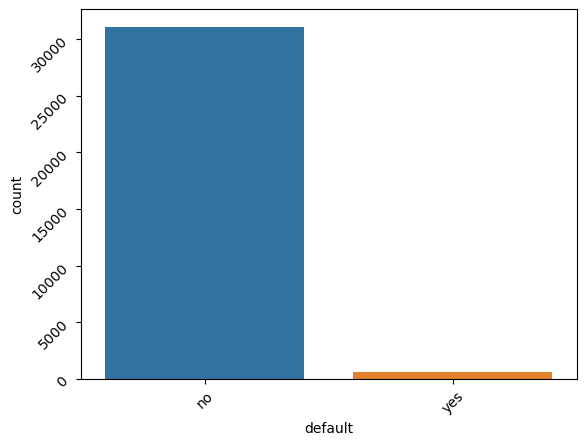

In [57]:
print(df["default"].value_counts())
sns.countplot(x="default",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**You can see most of the people are not defaulters and that is great.Only few person default their loans.** 

no     31062
yes      585
Name: default, dtype: int64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

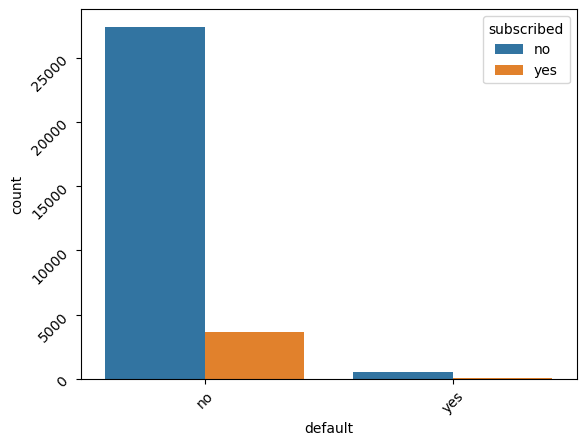

In [58]:
#Visualizing default column data according to our Target column 
print(df["default"].value_counts())
sns.countplot(x="default",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Very few people, who are defaulter still subcribe the term deposite but that ratio is very less.Most people who are not defaulter subcribe the term deposit.**

yes    17584
no     14063
Name: housing, dtype: int64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

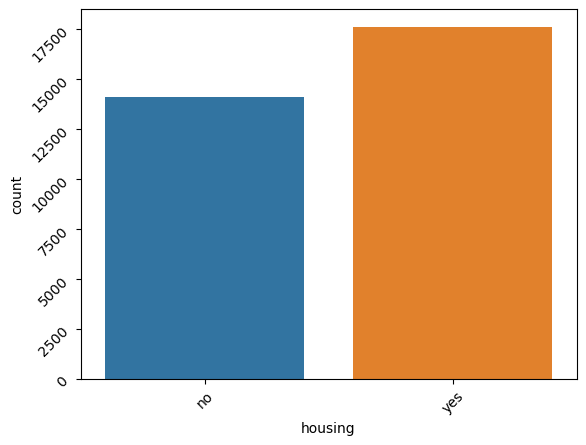

In [59]:
print(df["housing"].value_counts())
sns.countplot(x="housing",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**There are more person who has house loan compare than those person who dont have house loans.**

yes    17584
no     14063
Name: housing, dtype: int64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

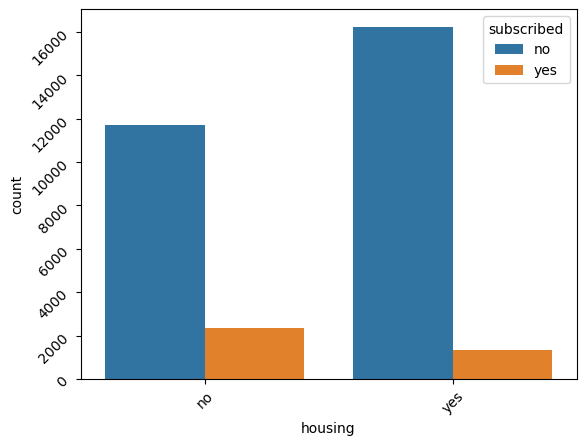

In [60]:
#Visualizing housing column data according to our Target column 
print(df["housing"].value_counts())
sns.countplot(x="housing",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**We can see person who have no house loan are more eager to deposit their money compare to those who already took the house loan.**

no     26516
yes     5131
Name: loan, dtype: int64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

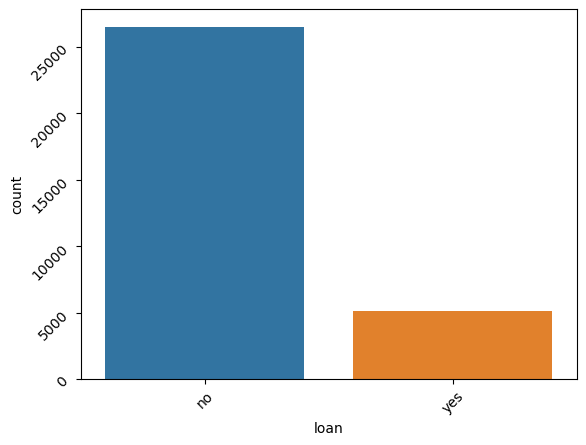

In [61]:
print(df["loan"].value_counts())
sns.countplot(x="loan",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**There are more people who dont have any loans on running and very less people have taken the loan.**

no     26516
yes     5131
Name: loan, dtype: int64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

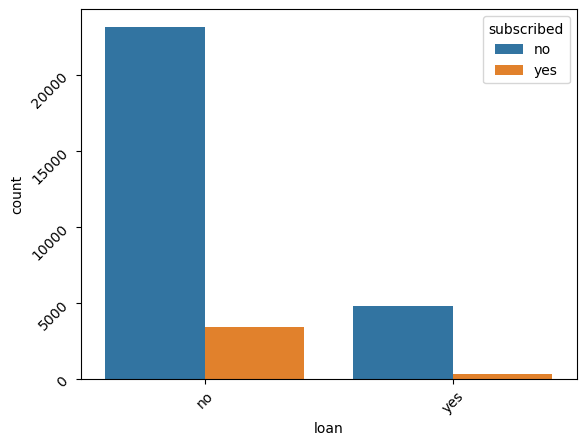

In [62]:
#Visualizing housing column data according to our Target column 
print(df["loan"].value_counts())
sns.countplot(x="loan",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Oviously those person who takes the loan are less interested to take a term deposit subscription and the persons who dont take any loan they are eager to subcribe term deposit.** 

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'telephone'), Text(1, 0, 'cellular'), Text(2, 0, 'unknown')])

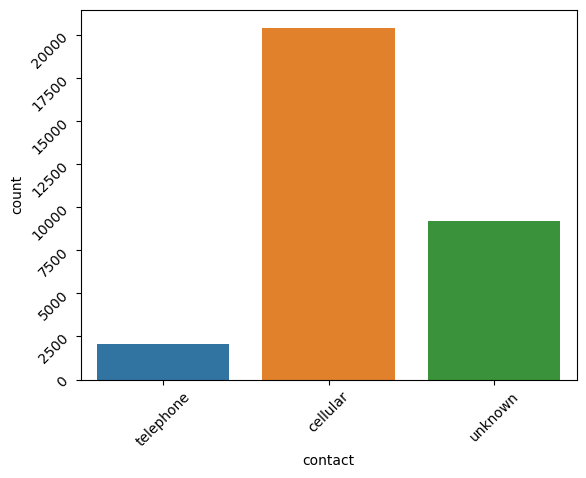

In [63]:
print(df["contact"].value_counts())
sns.countplot(x="contact",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**We can see Banks typically do more calling their customers with the mobile numbers rather that the normal Landline numbers.**

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'telephone'), Text(1, 0, 'cellular'), Text(2, 0, 'unknown')])

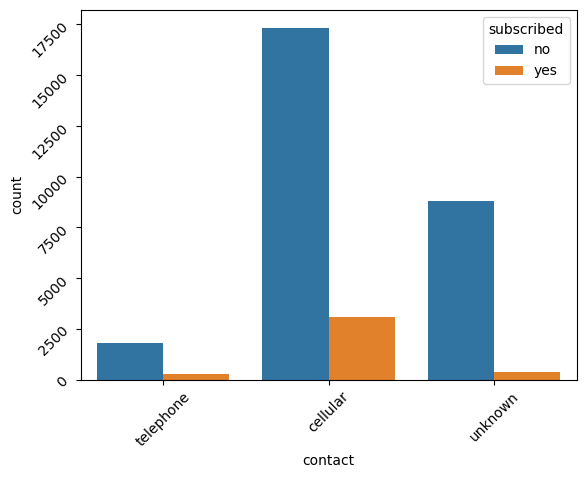

In [64]:
#Visualizing contact column data according to our Target column 
print(df["contact"].value_counts())
sns.countplot(x="contact",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Those people who gets call from Bank in mobile number they are more eager to subcribe the term deposit.There might be another reason if banks calling from Landline those call might be indicate as scam call.** 

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'nov'),
  Text(1, 0, 'jul'),
  Text(2, 0, 'jun'),
  Text(3, 0, 'feb'),
  Text(4, 0, 'sep'),
  Text(5, 0, 'jan'),
  Text(6, 0, 'may'),
  Text(7, 0, 'aug'),
  Text(8, 0, 'apr'),
  Text(9, 0, 'oct'),
  Text(10, 0, 'mar'),
  Text(11, 0, 'dec')])

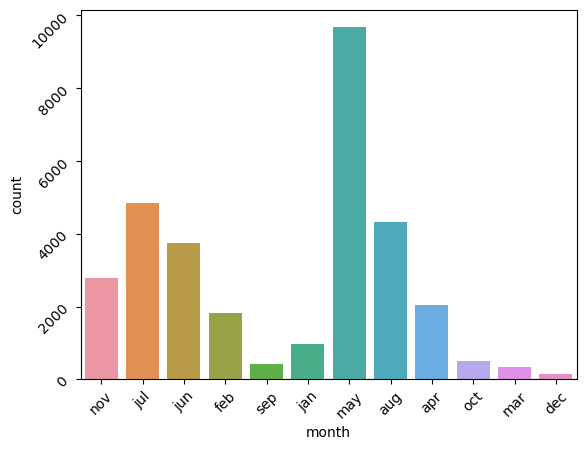

In [65]:
print(df["month"].value_counts())
sns.countplot(x="month",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Here we can see most of the call made on may.**

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'nov'),
  Text(1, 0, 'jul'),
  Text(2, 0, 'jun'),
  Text(3, 0, 'feb'),
  Text(4, 0, 'sep'),
  Text(5, 0, 'jan'),
  Text(6, 0, 'may'),
  Text(7, 0, 'aug'),
  Text(8, 0, 'apr'),
  Text(9, 0, 'oct'),
  Text(10, 0, 'mar'),
  Text(11, 0, 'dec')])

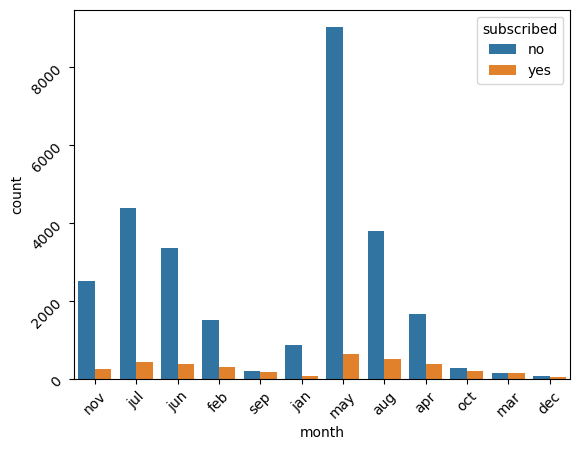

In [66]:
#Visualizing month column data according to our Target column 
print(df["month"].value_counts())
sns.countplot(x="month",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Here we can see most of the term diposit made by customers on may,august and april and Very less customer subcribe term deposit on december and january.**

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'success'),
  Text(2, 0, 'failure'),
  Text(3, 0, 'other')])

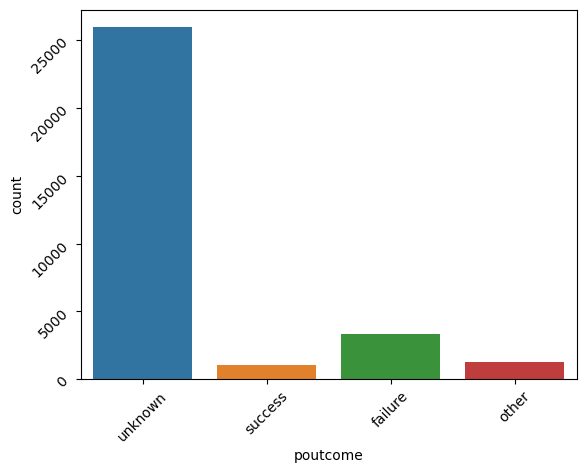

In [67]:
print(df["poutcome"].value_counts())
sns.countplot(x="poutcome",data=df)
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Most of the customer's decision unknown and less customers are agree to subcribe a term deposit.**

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'success'),
  Text(2, 0, 'failure'),
  Text(3, 0, 'other')])

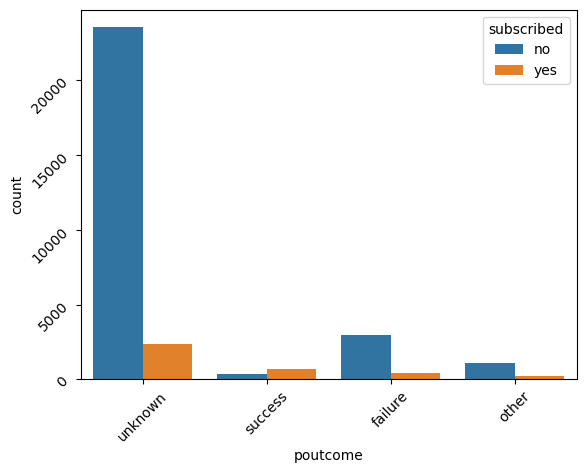

In [68]:
#Visualizing month column data according to our Target column 
print(df["poutcome"].value_counts())
sns.countplot(x="poutcome",data=df,hue="subscribed")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

**Here we can see those customer's whos motive are unknown some of them are agree to subcribe a turm deposite.Even those customer who  refuse to open a term deposit some of them are also making decision to subcribe term deposit.**

# Bi-Variate analysis

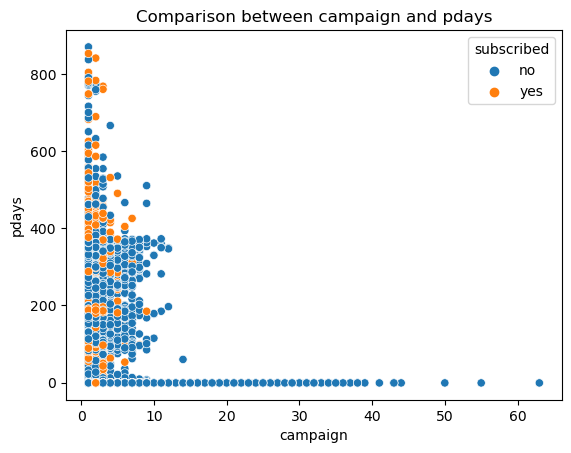

In [69]:
#Comparing campaign and pdays
plt.title("Comparison between campaign and pdays") 
sns.scatterplot(x="campaign", y="pdays", data=df,hue="subscribed")
plt.show()

**Here we can see those customers who get more calls during this campaign,they dont deposit and those customer who has 300 to 600 days after last contact,more people are subcribe the term deposit.And those customers who contacted 800 days ago they also deposit.** 

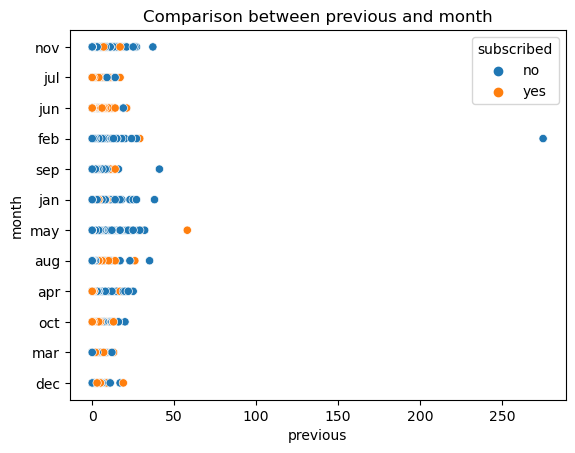

In [70]:
#Comparing previous and month
plt.title("Comparison between previous and month") 
sns.scatterplot(x="previous", y="month", data=df,hue="subscribed")
plt.show()

**Here you can see most of the contact made on May but there is just one person who decide to deposit.
Otherhand in june most of the person decide to deposit.
And most of the depositer subcribe the term deposit before 25 days of this campaign.**


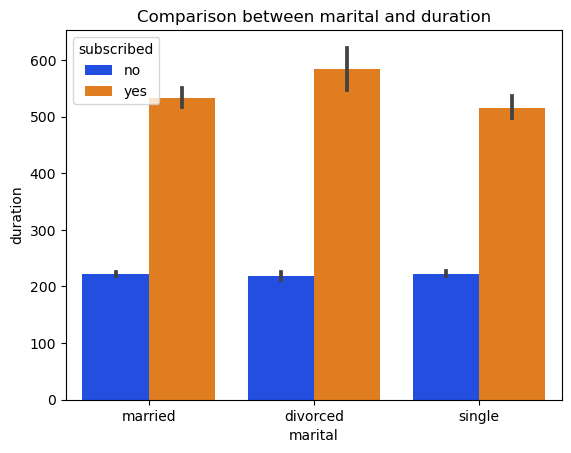

In [71]:
#Comparing marital and duration
plt.title("Comparison between marital and duration") 
sns.barplot(x="marital", y="duration", data=df,hue="subscribed",palette="bright")
plt.show()

**Here you can see those customers who contacted for longer duration they subcribe the term deposit and those customer who contacted for less duration they did not agree to deposit no matter what their marital status.**

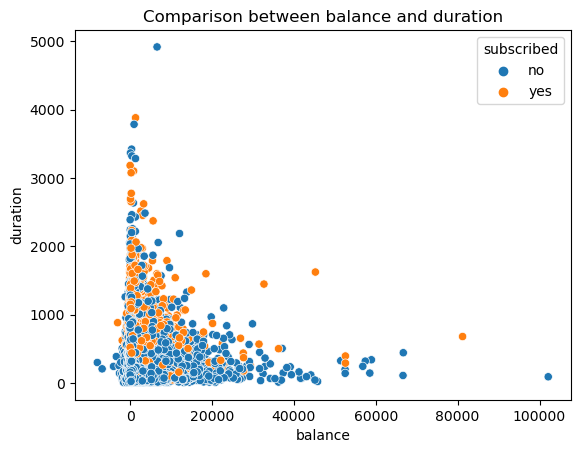

In [72]:
#Comparing balance and duration
plt.title("Comparison between balance and duration") 
sns.scatterplot(x="balance", y="duration", data=df,hue="subscribed")
plt.show()

**So here we can see customers who has huge amount of money they dont want to subcribe theterm deposit and most of the customer who wants to subcribe the term deposit they have less money and they prefer deposit for less duration not for long term.**

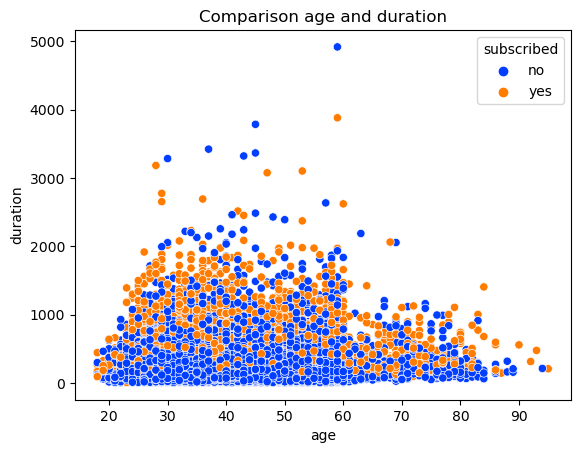

In [73]:
#Comparing age and duration
plt.title("Comparison age and duration") 
sns.scatterplot(x="age", y="duration", data=df,hue="subscribed",palette="bright")
plt.show()

**Here we can see those who's age between  20 to 40 they are more eagerness toward the deposit but for less duration. And when customers age are increasing there interest of deposit goes for even less period of time.**

# Multivariate analysis

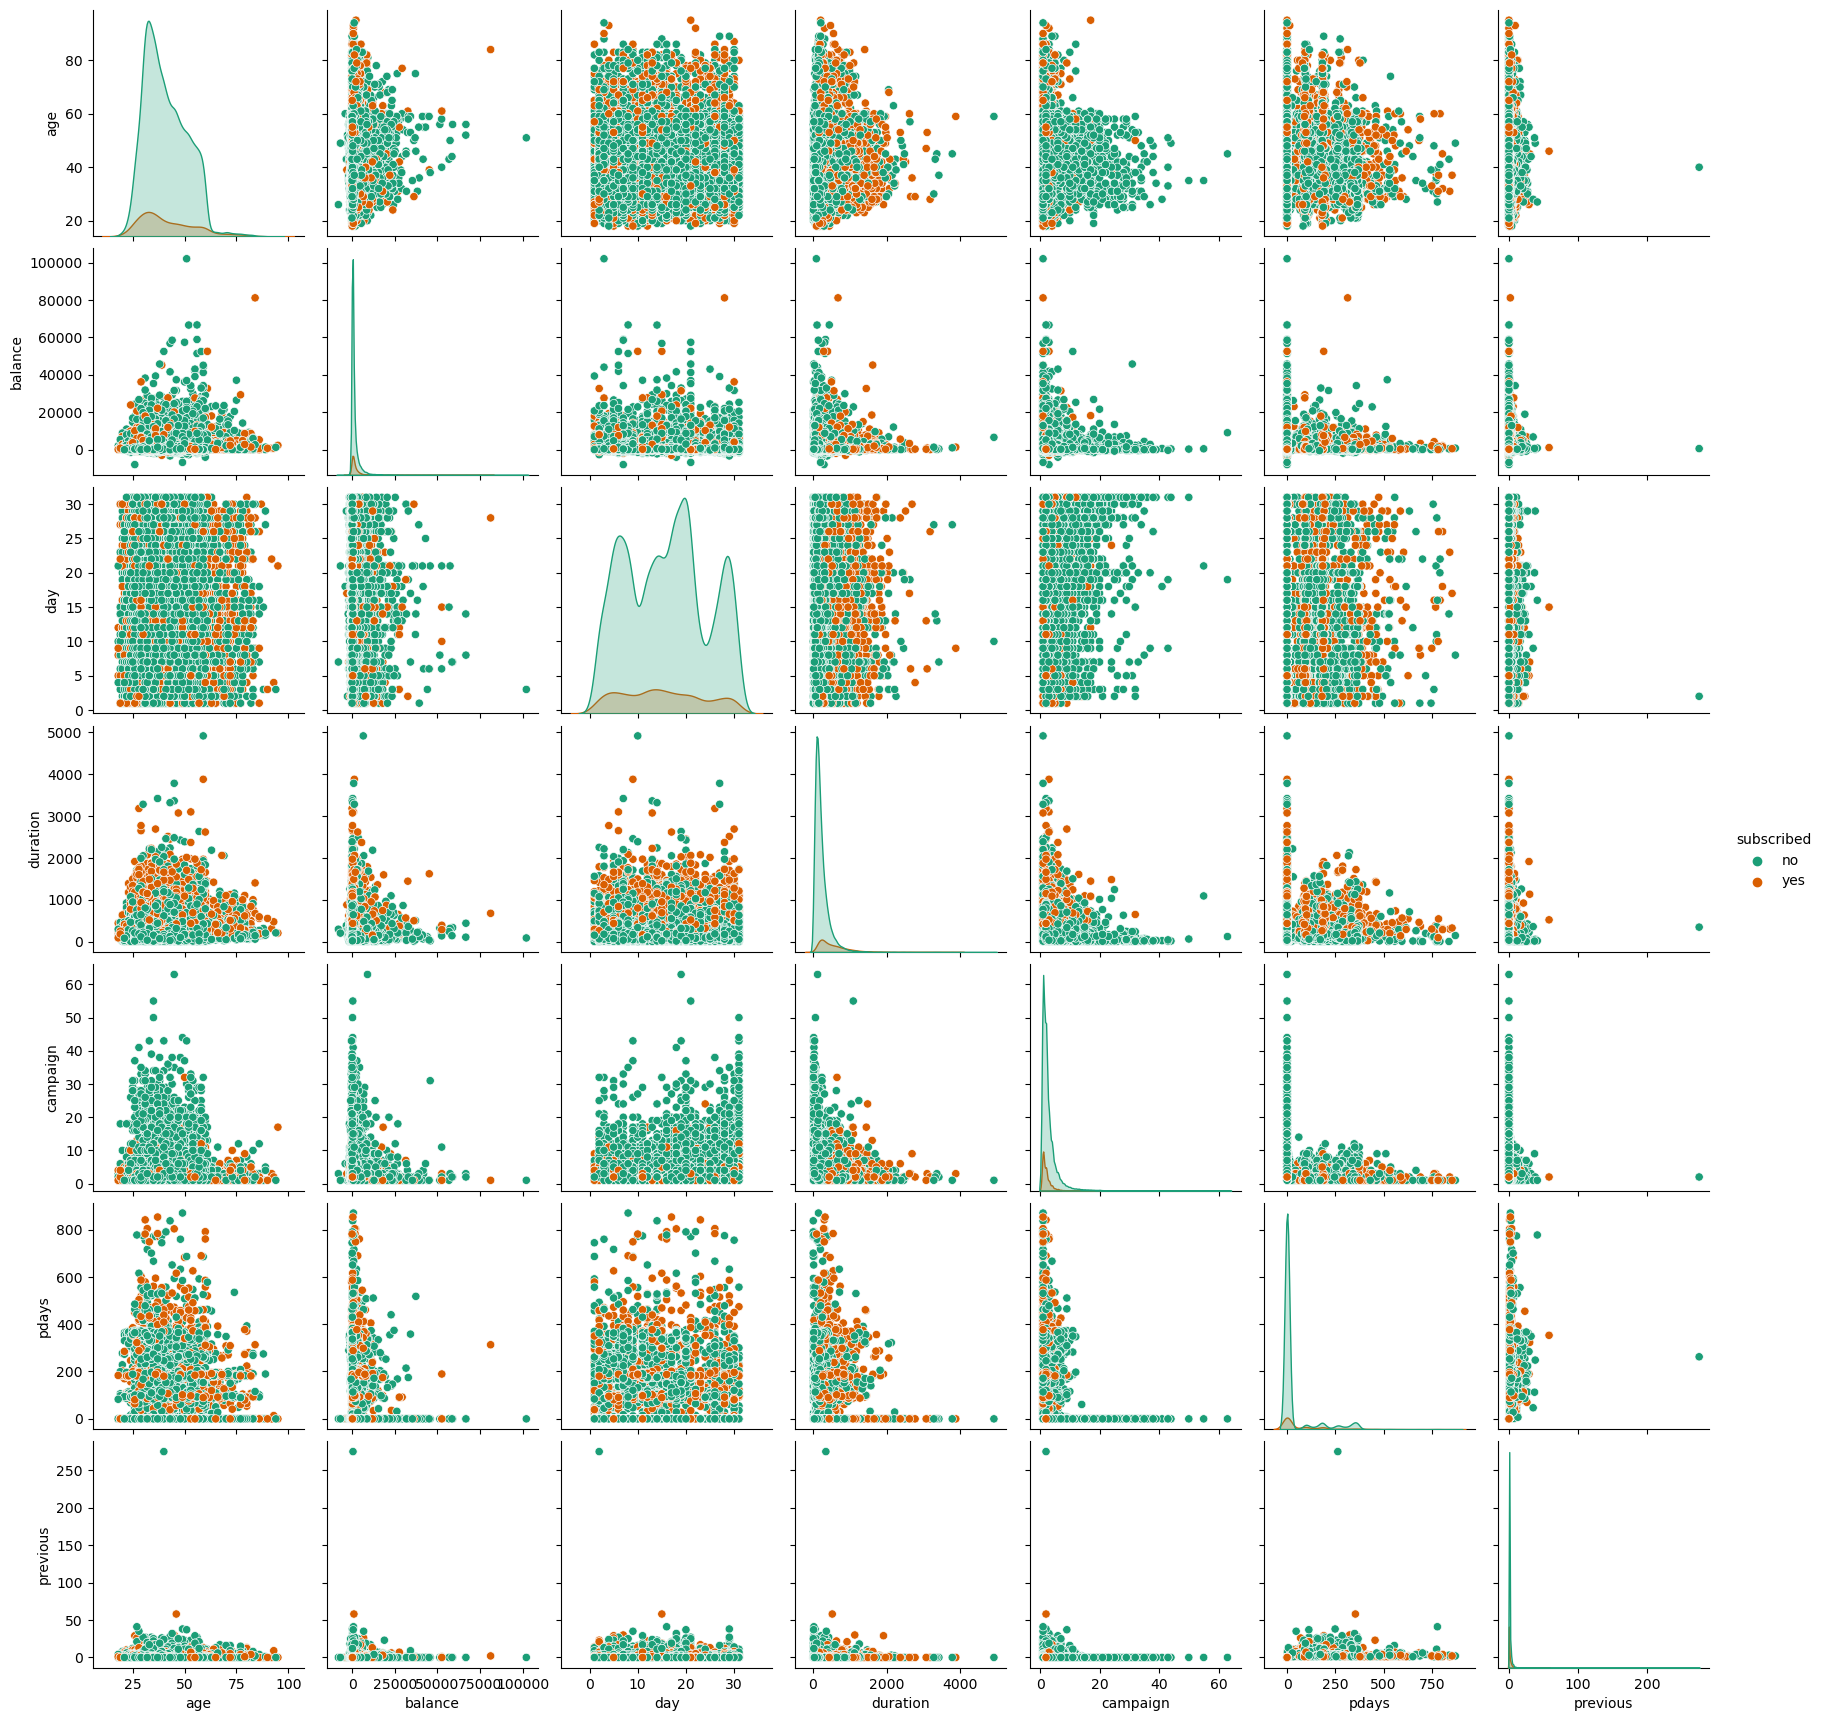

In [74]:
sns.pairplot(df,hue="subscribed",palette="Dark2")
plt.show()

**Observation:-**
    
1) Here you can see a negative relation between balance and duration,campaign and duration.

2) Here some outliers are present but we have to make sure it after ploting boxplot.

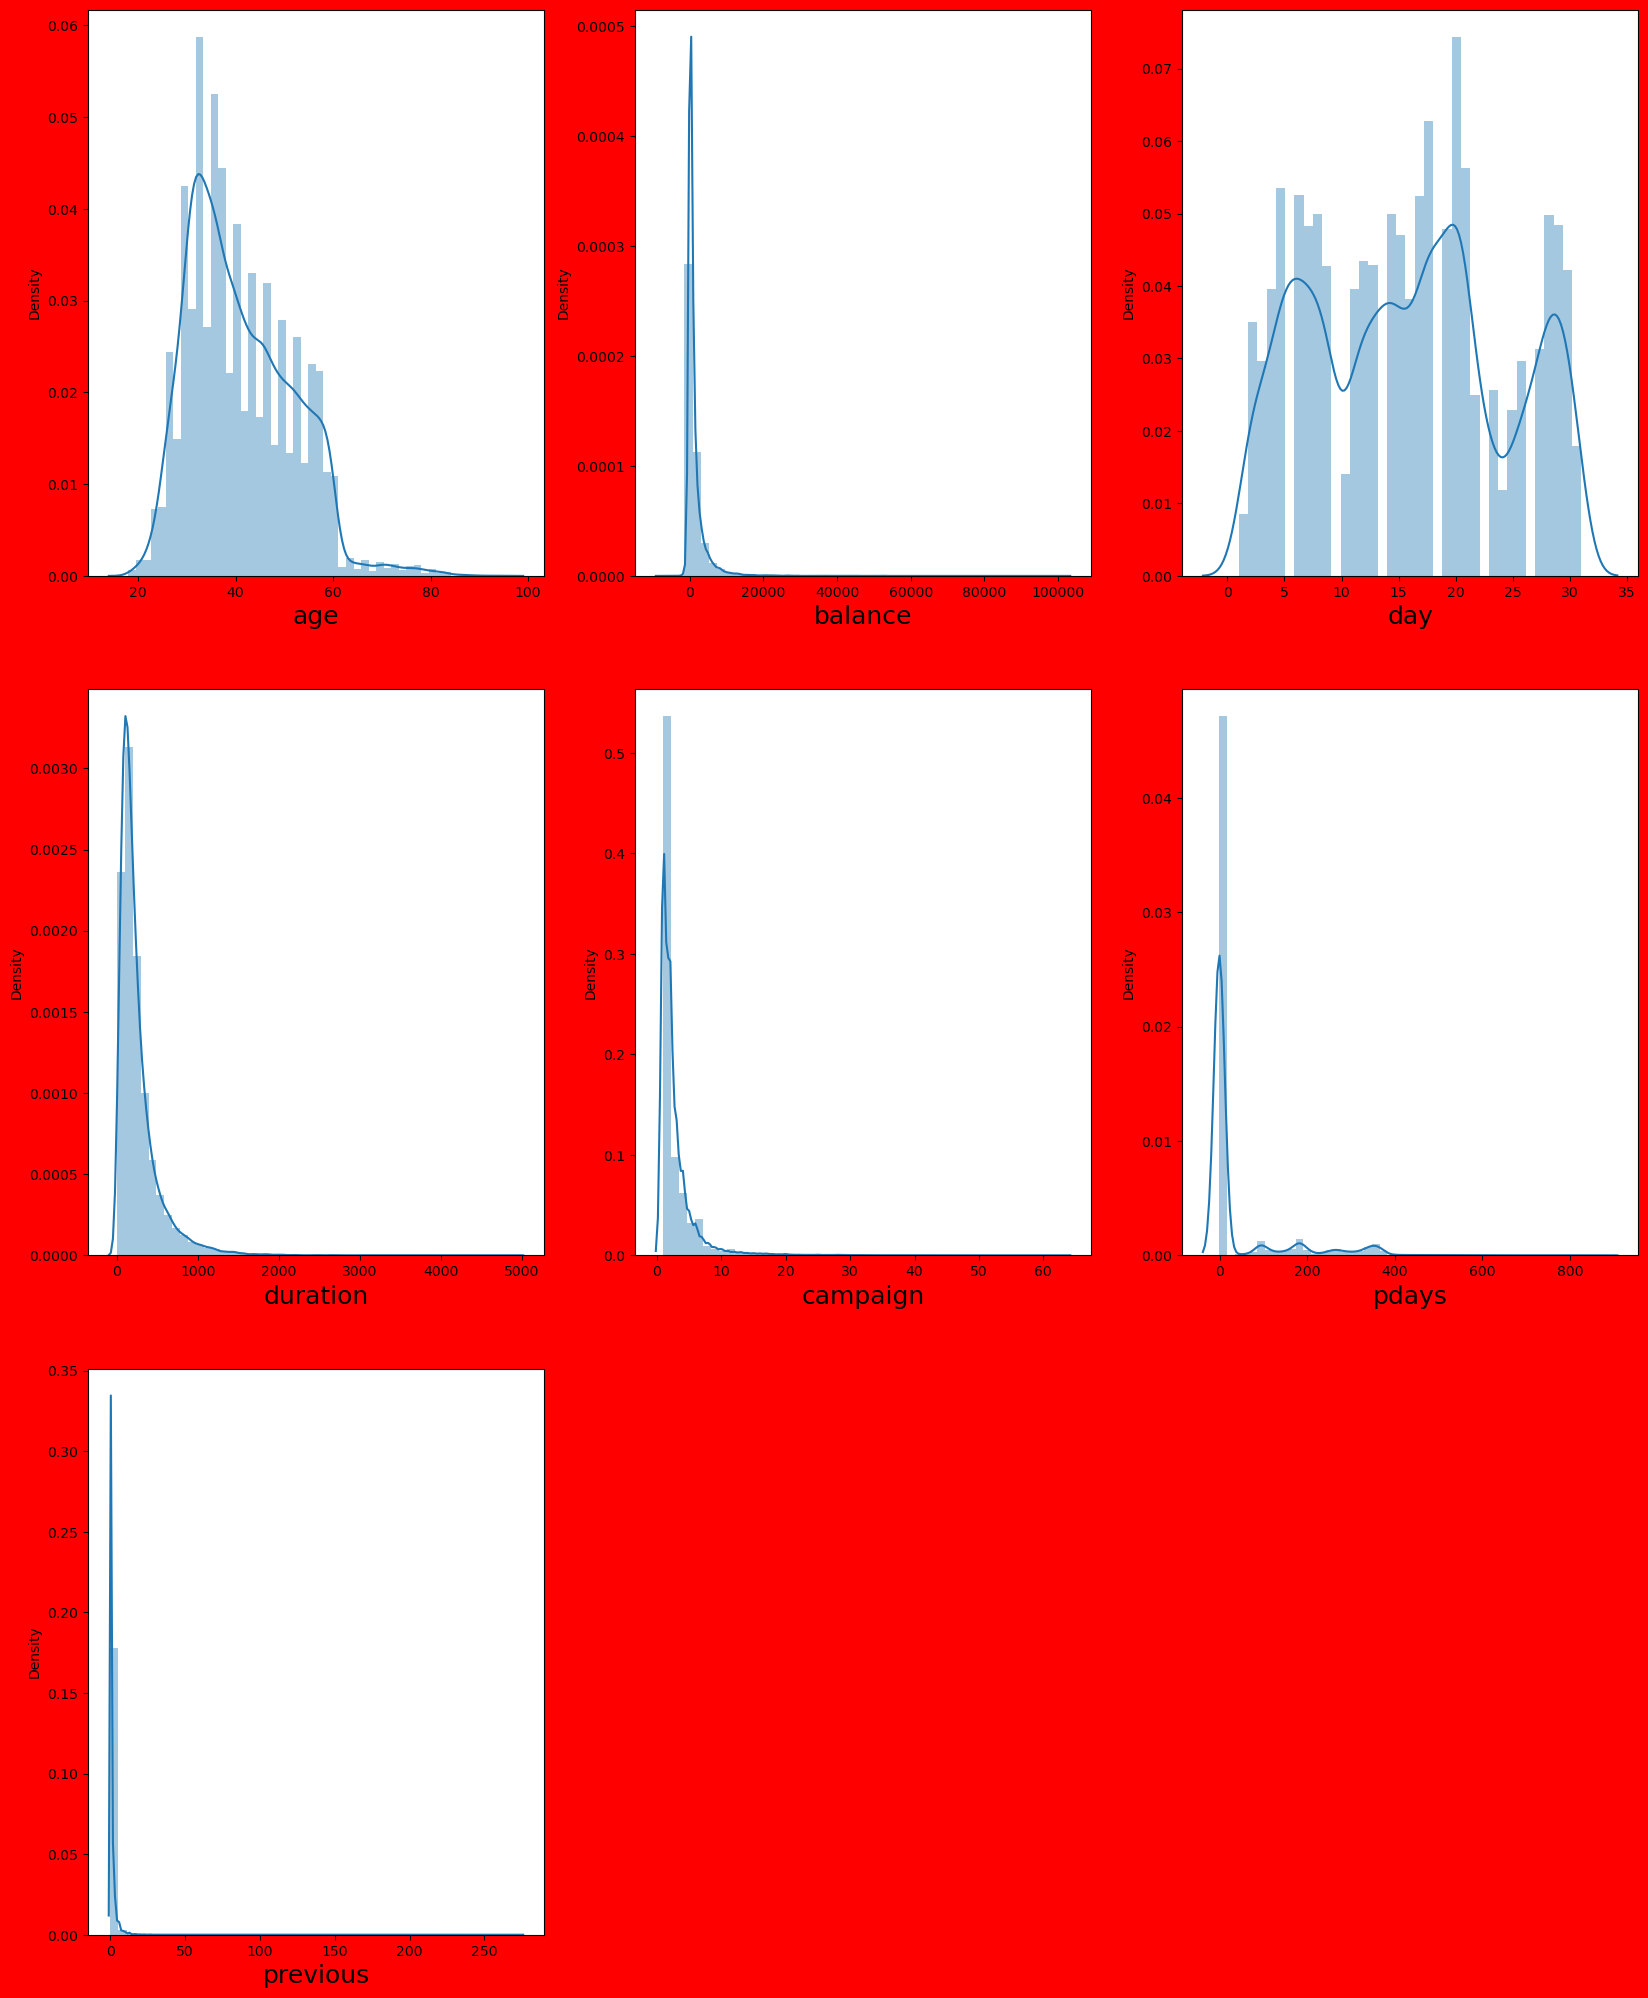

<Figure size 640x480 with 0 Axes>

In [75]:
#Checking data ditribution for all columns
plt .figure(figsize=(20,25),facecolor="r")
plot=1

for i in df.columns:
    if plot<14:
        if df[i].dtypes=="object":
            continue
        plt.subplot(3,3,plot)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
        
    plot+=1
    
plt.show()
plt.tight_layout()

**Observation:-**
    
Here you can see age column has right tail skewness.

# Checking for outliers:

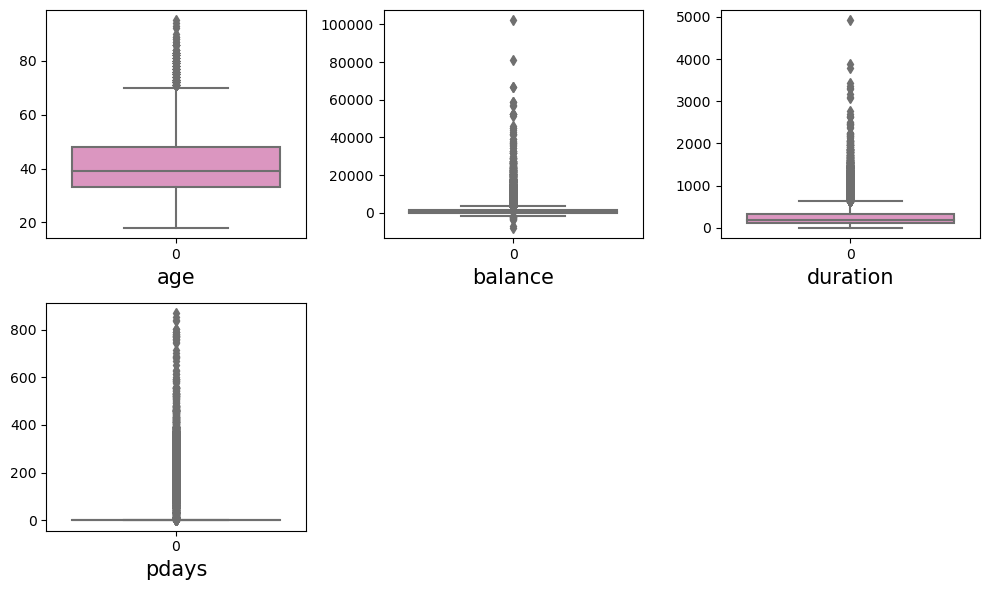

In [76]:
#Some columns I am avoiding to take because those have categorical data
values=df[["age","balance","duration","pdays"]]
plt.figure(figsize=(10,6),facecolor="white")
plot_number=1
for col in values:
    if plot_number<=8:
        ax=plt.subplot(2,3,plot_number)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        
    plot_number+=1
    
plt.tight_layout()
plt.show()


**Observation:-**
    
1) Here we can see "age","balance","duration","pdays" all of them has outliers so we have to remove them.

2) From my previous experience I know less datalost happen when we use zscore compare with IQR method,sso we will take zscore method to take out of the outliers.

3) we can also see pdays column has no box or wiskers to show because this column's data points are too close.

# Removing outliers

**Using zscore:-**

In [78]:
from scipy.stats import zscore
values=df[["age","balance","duration","pdays"]]
z=np.abs(zscore(values))
z

,age,balance,duration,pdays
0,1.415793,0.187933,0.832754,0.408555
1,0.937156,0.449397,0.649957,0.408555
2,1.313627,0.156159,0.070449,0.408555
3,1.509911,0.635055,2.368149,0.447299
4,0.937156,0.411091,0.474054,0.408555
...,...,...,...,...
31642,1.125392,0.450388,0.552724,0.408555
31643,1.133439,0.324903,0.699635,0.408555
31644,0.843038,0.347358,0.859979,0.408555
31645,1.509911,0.376088,0.918319,2.994723


# Finding outliers location

In [79]:
np.where(z>3)

(array([   26,    36,    50, ..., 31622, 31622, 31646], dtype=int64),
 array([1, 3, 3, ..., 0, 3, 2], dtype=int64))

In [80]:
#Checking outliers using it's location
z.iloc[26,1]

5.299785542835557

**You can the the value of 26th no.row and 1st no. column is 5.29.... that is more than 3 that means it's a outlier.**

# Creating a outlier free dataset

In [81]:
#Removing outliers
new_df=df[(z<3).all(axis=1)]
new_df.shape

(29019, 17)

In [82]:
#Checking old Dataframe counts with new outliers free Dataframe
print("Old Dataframe:-",df.shape[0])
print("New Dataframe:-",new_df.shape[0])
print("The counts of rows we lost due to outliers are:-",df.shape[0]-new_df.shape[0])

Old Dataframe:- 31647
New Dataframe:- 29019
The counts of rows we lost due to outliers are:- 2628


# Checking Data lost percentage after removing outliers

In [83]:
#Checking the datalost percentage after removing outliers using zscore method
print("Data  lost percentage after removing outliers using zscore method",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data  lost percentage after removing outliers using zscore method 8.304104654469619


**So here you can see 8% of the data is lost due to outliers but we can afford it.**

# Checking for skewness

In [84]:
new_df.skew().to_frame("Skewness value")

,Skewness value
age,0.441893
balance,2.431272
day,0.061279
duration,1.593476
campaign,4.767464
pdays,2.742618
previous,58.667136


**Observation:-**
    
1) Here we can see some columns are missing for skewness checking because those have categorical data and we dont need to check categorical column skewness.

2) Our acceptable skewness range is +0.5 to -0.5 and here you can see balance,duration,campaign,pdays and previous those have skewness value out of our acceptable range so we have to reduce them.

# Reducing Skewness

In [85]:
#Trying to reduce skewness using cube root method
a=new_df["balance"]
b=new_df["duration"]
c=new_df["campaign"]
d=new_df["pdays"]
e=new_df["previous"]


a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)
d=np.cbrt(d)
e=np.cbrt(e)


print("balance:",a.skew())
print("duration:",b.skew())
print("campaign:",c.skew())
print("pdays:",d.skew())
print("previous:",e.skew())


balance: -0.4316940932094907
duration: 0.27673674514015484
campaign: 1.6651316790770945
pdays: 2.110309436105978
previous: 2.4495306957835044


**Here we can see balance,duration column's skewness is reduced while using cube root method so I will implement it permanently to this column.**

In [86]:
#Reducing skewness for duration and balance column using cube root method permanently
new_df["balance"]=np.cbrt(new_df["balance"])
new_df["duration"]=np.cbrt(new_df["duration"])

In [87]:
new_df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [88]:
#Checking skewness again for all column
new_df.skew()

age          0.441893
balance     -0.431694
day          0.061279
duration     0.276737
campaign     4.767464
pdays        2.742618
previous    58.667136
dtype: float64

**So now i have to remove skewness for campaign,pdays and previous. Now I will use PowerTransformation to reduce skewness for these columns**

In [89]:
#using PowerTransformer to reduce the skewness
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

c=new_df["campaign"]
d=new_df["pdays"]
e=new_df["previous"]

#Reshaping the columns because power transformar need 2d array instead 1d
c_reshape=c.values.reshape(-1,1)
d_reshape=d.values.reshape(-1,1)
e_reshape=e.values.reshape(-1,1)


#Now fitting the Transformer
c_transform=pt.fit_transform(c_reshape)
d_transform=pt.fit_transform(d_reshape)
e_transform=pt.fit_transform(e_reshape)

#Convert the transformed array back to the DataFrame
c=pd.DataFrame(c_transform)
d=pd.DataFrame(d_transform)
e=pd.DataFrame(e_transform)


print("campaign skewness:",c.skew())
print("pdays skewness:",d.skew())
print("previous skewness:",e.skew())



campaign skewness: 0    0.230164
dtype: float64
pdays skewness: 0    2.006029
dtype: float64
previous skewness: 0    2.005374
dtype: float64


**Now we can see campaign column's skewness is reduced so I will make this change parmanently.**

In [90]:
#using PowerTransformer to reduce the skewness of campaign 
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

campaign_reshape=new_df["campaign"].values.reshape(-1,1)

#Now fitting the Transformer
campaign_transform=pt.fit_transform(campaign_reshape)

#Converting transformed array back to the DataFrame
new_df["campaign"]=pd.DataFrame(campaign_transform)

In [91]:
new_df.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign      2413
pdays            0
previous         0
poutcome         0
subscribed       0
dtype: int64

Here you can see 2413 rows are null in campaign column after applyiing PowerTransformer.ISo I have to fill it.I will go for median method to fill it so there would be no outlier problem occurs.

In [93]:
#Filling NaN value in campaign column with median
new_df["campaign"].fillna(new_df["campaign"].median(),inplace=True)

In [94]:
#Checking Nan value again
new_df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

**Here you can see no null value is present in any column.**

In [95]:
#Checking skewness again
new_df.skew()

age          0.441893
balance     -0.431694
day          0.061279
duration     0.276737
campaign     0.206503
pdays        2.742618
previous    58.667136
dtype: float64

**Now we can see campaign  column's skewness is also reduced permanently.So now I have to reduce skewness for pdays and previous column only.**   

In [96]:
#Trying to reduce skewness using log normal distribution

d=new_df["pdays"]
e=new_df["previous"]

d=np.log(d)
e=np.log(e)


print("pdays:",d.skew())
print("previous:",e.skew())

pdays: -2.973901853713005
previous: nan


**So you can see log normal distribution is not working.Now I will try log + 1 method.**

In [97]:
#Trying to reduce skewness using log+1

d=new_df["pdays"]
e=new_df["previous"]

d=np.log1p(d)
e=np.log1p(e)


print("pdays:",d.skew())
print("previous:",e.skew())

pdays: nan
previous: 2.9142649518546406


**Log1p is also not working so I will try sqrt method to reduce skewness.**

In [98]:
#Trying to reduce skewness using sqrt

d=new_df["pdays"]
e=new_df["previous"]

d=np.sqrt(d)
e=np.sqrt(e)


print("pdays:",d.skew())
print("previous:",e.skew())

pdays: -0.6802309381420797
previous: 3.4538478923816163


**Still it would not work.Lets try boxcox.**

In [99]:
#Trying to reduce skewness using boxcox
from scipy.stats import boxcox
try:
    d=new_df["pdays"]
    e=new_df["previous"]
    d=boxcox(d)
    e=boxcox(e)
    print("pdays:",d.skew())
    print("previous:",e.skew())
    
except ValueError:
    print("Data must be positive")

Data must be positive


**It would not work because data have to be positive.**

**Observation:-**
    
1) So using all tranformation techniques like log,log1p,PowerTransformer,sqrt,cbrt,boxcox we can not reduce the skewness value of "pdays" and "previous" column so I have to consider this skewness values are their threshold and we have to accept it. 

# Checking Data Distribution

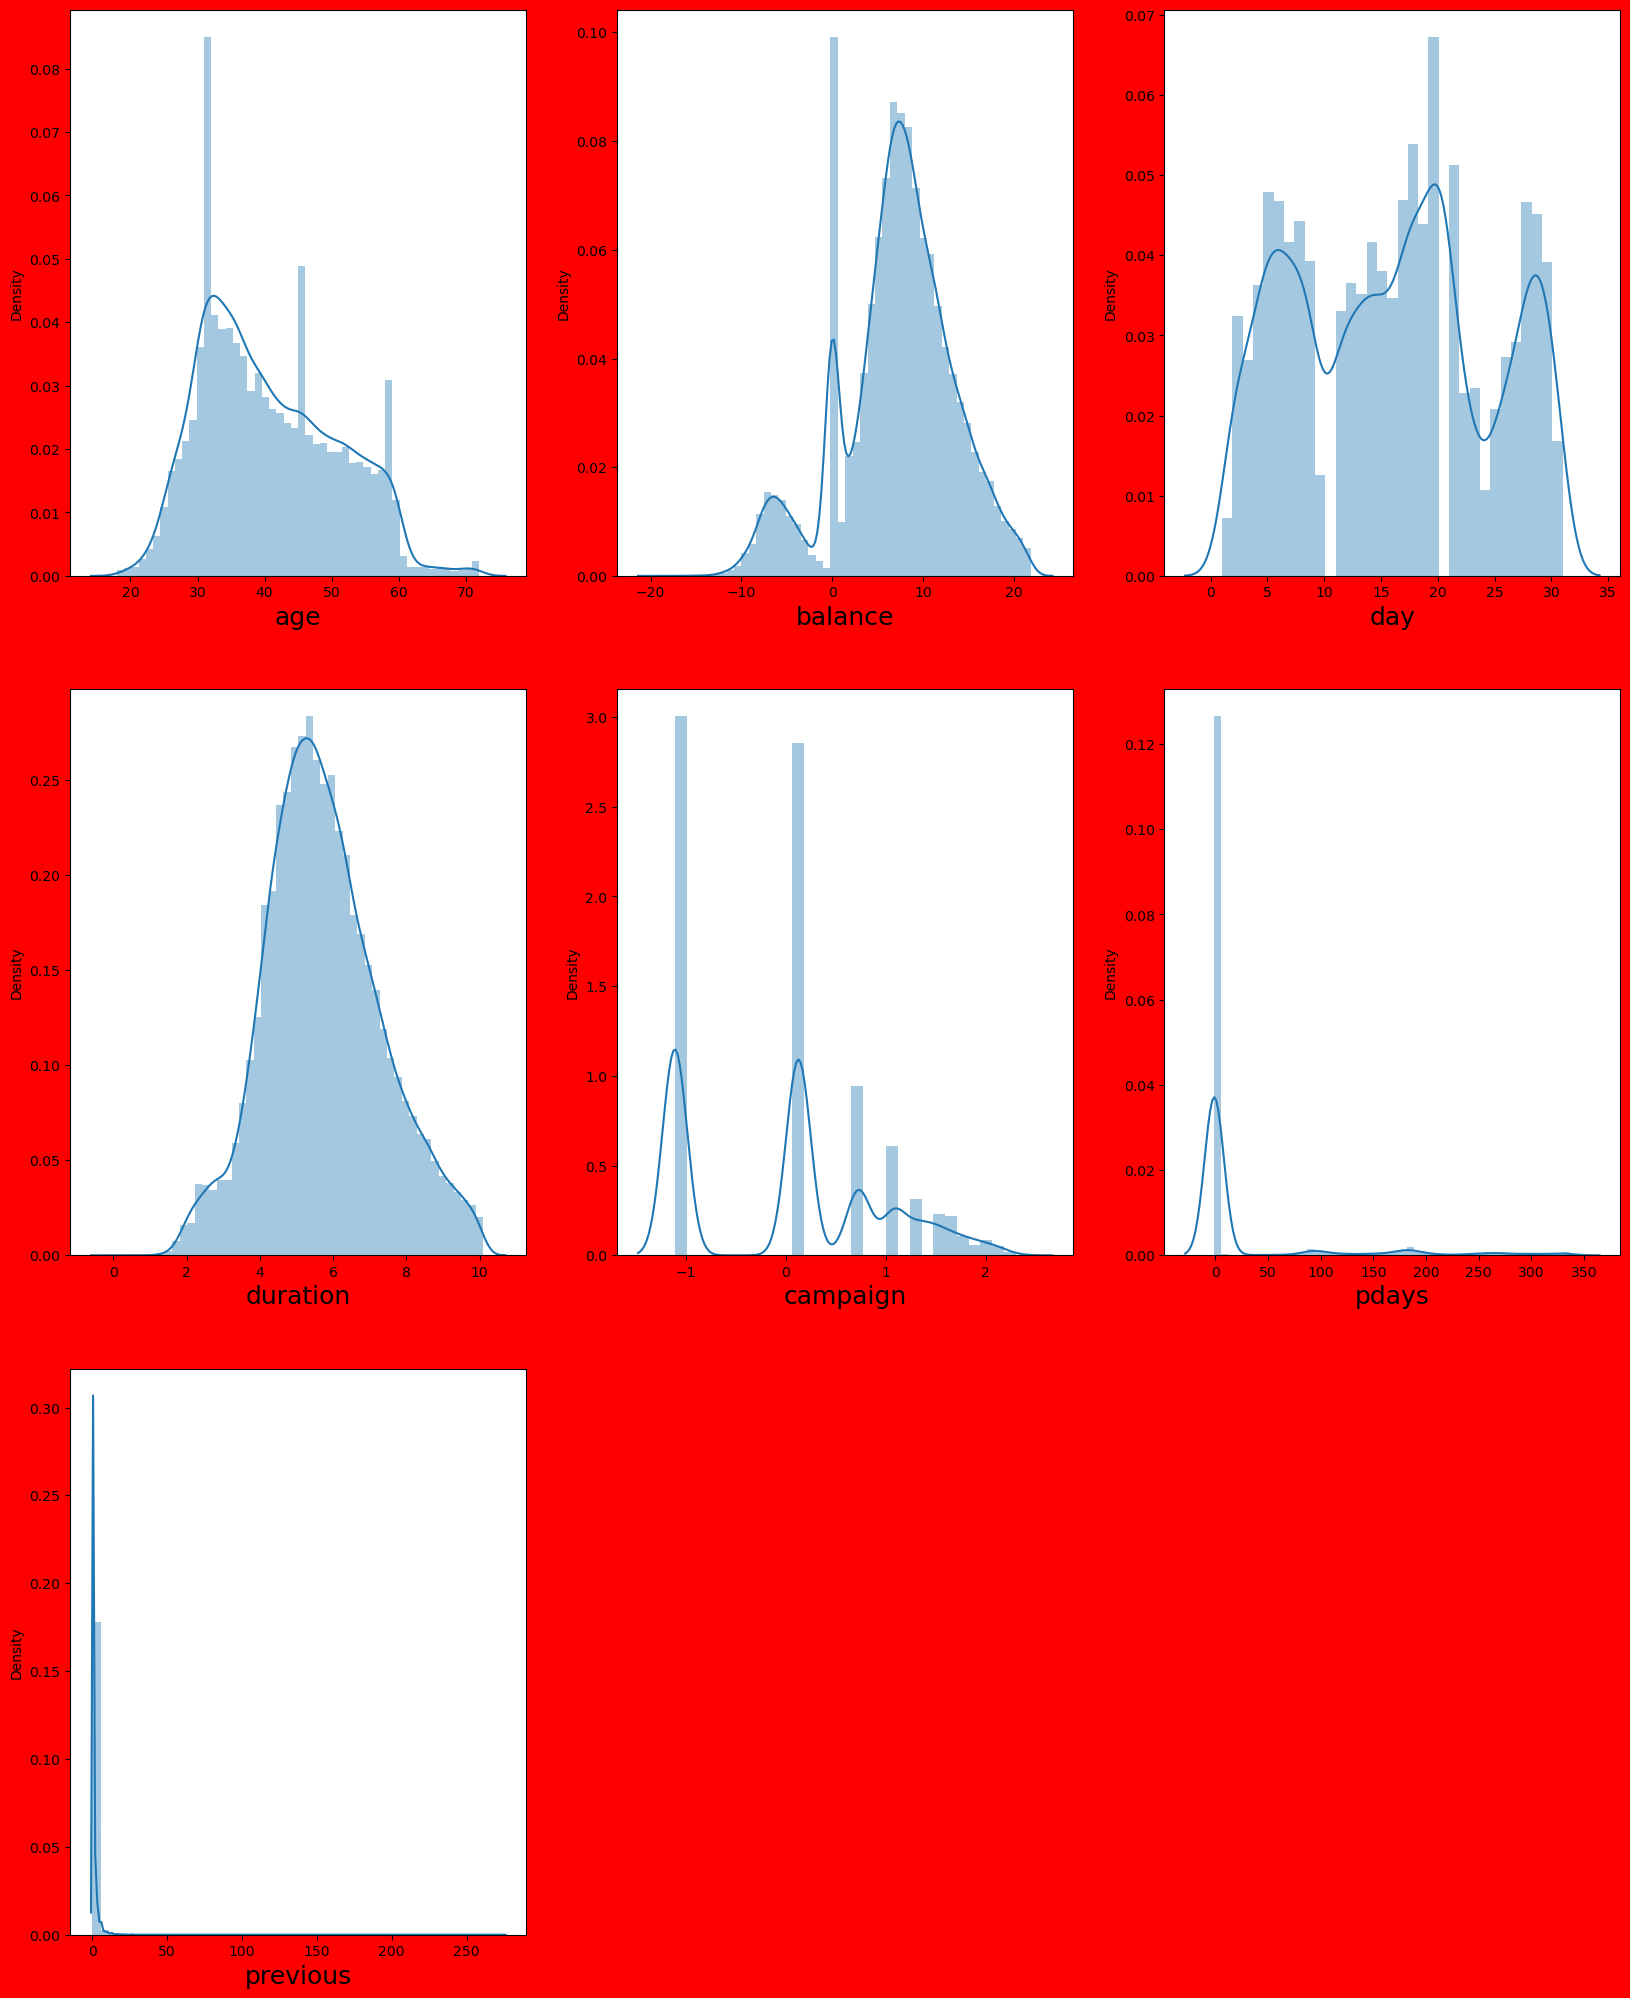

<Figure size 640x480 with 0 Axes>

In [100]:
plt .figure(figsize=(20,25),facecolor="r")
plot=1

for i in new_df.columns:
    if plot<14:
        if new_df[i].dtypes=="object":
            continue
        plt.subplot(3,3,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=18)
        
    plot+=1
    
plt.show()
plt.tight_layout()

**Here you can except age column most of the columns data are normally distributed.**

**So our next stage is to find correlation between but for that I have to encode my Target column because that column has categorical data and beside that I have to encode all my column those have categorical data.Lets see how can I do it:**

# Encoding Categorical Columns

In [101]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

for col in new_df.columns:
    if new_df[col].dtypes=="object":
        new_df[col]=LE.fit_transform(new_df[col])

In [102]:
new_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,12.456918,0,0,1,19,9,3.530348,0.125281,-1,0,3,0
1,31,11,1,1,0,1.442250,0,0,0,20,5,4.497941,0.125281,-1,0,3,0


**Now you can see all my categorical columns are converted with the integer numbers that means our LabelEncoder works.Now we can check correlation.**

# Correlation between Target column and Independent columns

In [103]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.032342,-0.409462,-0.099370,-0.010687,0.081069,-0.155031,0.004681,0.029136,-0.009648,-0.039632,-0.029397,-0.011607,-0.010002,0.004318,0.000194,-0.005534
job,-0.032342,1.000000,0.066782,0.170332,-0.003742,0.025842,-0.121853,-0.038246,-0.085759,0.022292,-0.089879,-0.003480,0.005124,0.002997,0.006778,-0.011893,0.036645
marital,-0.409462,0.066782,1.000000,0.108663,-0.011801,0.033318,-0.026753,-0.044941,-0.041103,-0.009611,-0.004137,0.017850,0.010183,0.015489,0.014563,-0.017059,0.056297
education,-0.099370,0.170332,0.108663,1.000000,-0.005950,0.063754,-0.096359,-0.048970,-0.122141,0.018582,-0.057407,-0.000002,0.009522,0.025042,0.027274,-0.039949,0.074302
default,-0.010687,-0.003742,-0.011801,-0.005950,1.000000,-0.208327,-0.014249,0.082905,0.013686,0.010284,0.006386,-0.002803,0.000129,-0.031845,-0.015897,0.035348,-0.016208
balance,0.081069,0.025842,0.033318,0.063754,-0.208327,1.000000,-0.070767,-0.140196,-0.054238,-0.018190,-0.004285,0.029720,-0.000256,0.067045,0.046168,-0.084051,0.095748
housing,-0.155031,-0.121853,-0.026753,-0.096359,-0.014249,-0.070767,1.000000,0.031797,0.217550,-0.020210,0.275565,0.009838,-0.005337,0.077436,0.018803,-0.052941,-0.144120
loan,0.004681,-0.038246,-0.044941,-0.048970,0.082905,-0.140196,0.031797,1.000000,-0.013198,0.015332,0.027410,-0.009950,-0.005948,-0.006966,-0.008758,0.001246,-0.076501
contact,0.029136,-0.085759,-0.041103,-0.122141,0.013686,-0.054238,0.217550,-0.013198,1.000000,-0.036056,0.391931,-0.035507,0.007658,-0.242775,-0.129051,0.252373,-0.158257
day,-0.009648,0.022292,-0.009611,0.018582,0.010284,-0.018190,-0.020210,0.015332,-0.036056,1.000000,0.006627,-0.056046,0.011069,-0.062179,-0.040238,0.052882,-0.034576


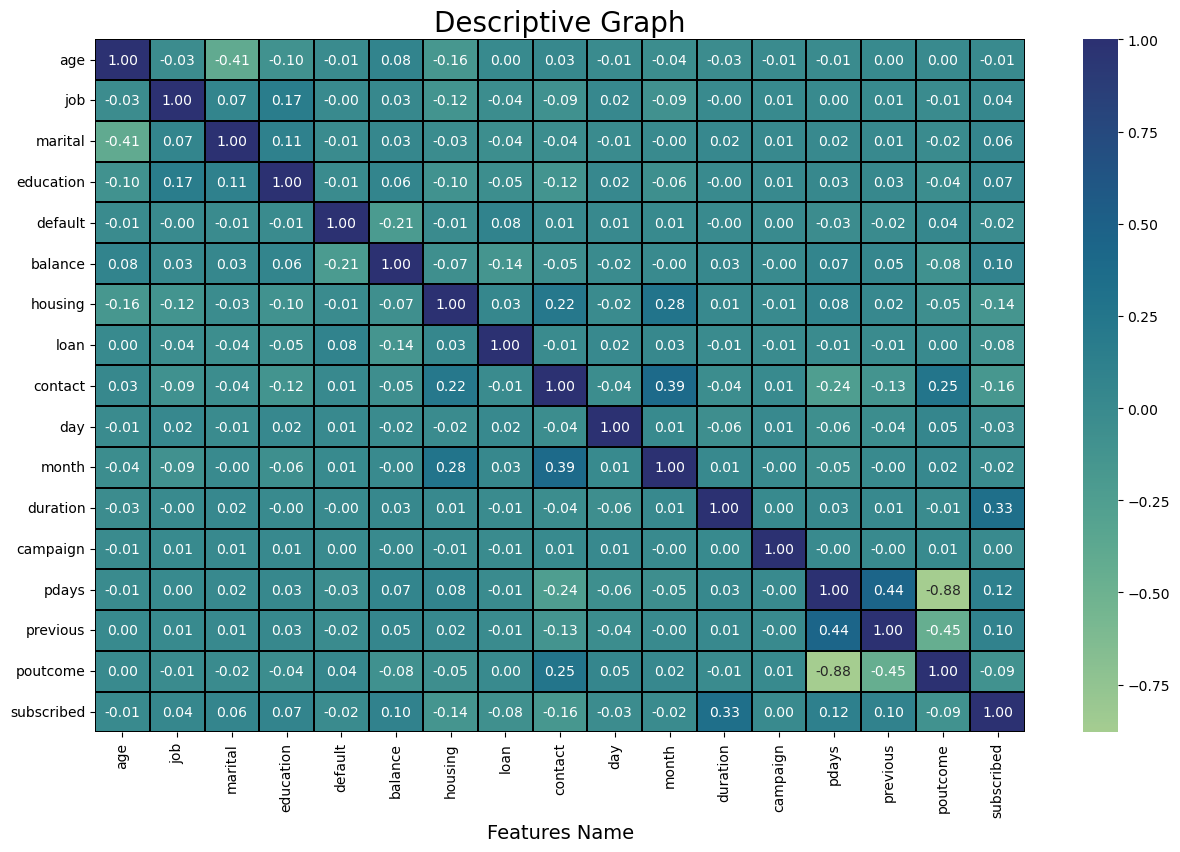

In [104]:
#Visualizing Correlation between Target variable and Independent variables using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(new_df.corr(),cmap="crest",fmt="0.2f",linewidth="0.2",linecolor="black",annot=True)
plt.xlabel("Features Name",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

**Observation:-**
    
*1) pdays and poutcome has highly negative correlation.*

*2) rest of the columns have slightly negative or positive correlation with each other.*

In [105]:
#Checking skewness in ascending order towards our Target column
new_df.corr()["subscribed"].sort_values(ascending=True)

contact      -0.158257
housing      -0.144120
poutcome     -0.094639
loan         -0.076501
day          -0.034576
month        -0.019891
default      -0.016208
age          -0.005534
campaign      0.000691
job           0.036645
marital       0.056297
education     0.074302
balance       0.095748
previous      0.096206
pdays         0.119459
duration      0.328735
subscribed    1.000000
Name: subscribed, dtype: float64

**Observation:-**
    
1)Here you can see duration is most position correlated column towards Target column and contact is most negative correlated column towards our Target column.

# Separating Target column and Features

In [106]:
#Separating Target and Independent variable
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

print("Features Dimension",x.shape)
print("Label dimension",y.shape)

Features Dimension (29019, 16)
Label dimension (29019,)


# Feature scalling using StadardScaler

In [107]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.524717,-1.321954,-0.278863,2.372017,-0.141168,0.859107,-1.107973,-0.447962,0.364094,0.359435,1.182185,-1.395539,0.119397,-0.371076,-0.203999,0.387518
1,-0.957068,2.020908,-0.278863,-0.304093,-0.141168,-0.915948,-1.107973,-0.447962,-0.733522,0.478043,-0.157350,-0.784798,0.119397,-0.371076,-0.203999,0.387518
2,-1.354153,0.805322,-0.278863,-0.304093,-0.141168,0.402346,0.902549,-0.447962,-0.733522,0.240826,-0.157350,0.298665,-1.170887,-0.371076,-0.203999,0.387518
3,1.623988,-0.106367,-1.931371,1.033962,-0.141168,1.247739,-1.107973,-0.447962,-0.733522,0.715260,0.177534,2.394837,-1.170887,0.811611,1.080690,-0.739274
4,-0.957068,1.413115,-0.278863,-0.304093,-0.141168,-0.355708,0.902549,-0.447962,-0.733522,-1.419693,-0.827117,0.947971,-1.170887,-0.371076,-0.203999,0.387518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29014,-0.361440,1.413115,1.373645,1.033962,-0.141168,0.614498,-1.107973,-0.447962,1.461711,-1.182476,0.177534,1.184199,0.119397,-0.371076,-0.203999,0.387518
29015,-1.155611,-0.106367,1.373645,1.033962,-0.141168,-1.148372,0.902549,-0.447962,-0.733522,-0.470825,0.847301,-0.545538,0.119397,-0.371076,-0.203999,0.387518
29016,1.226902,-0.106367,-1.931371,1.033962,-0.141168,0.018890,-1.107973,2.232330,-0.733522,-1.301084,0.177534,1.169651,0.119397,-0.371076,-0.203999,0.387518
29017,-0.857797,-0.106367,1.373645,1.033962,-0.141168,-0.055359,-1.107973,-0.447962,-0.733522,-1.063867,-1.496885,-1.520595,0.119397,-0.371076,-0.203999,0.387518


# Checking Multicollinearity

In [109]:
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns
vif

,VIF Values,Features Name
0,1.268830,age
1,1.049684,job
2,1.227369,marital
3,1.066351,education
4,1.050216,default
5,1.090532,balance
6,1.179235,housing
7,1.030042,loan
8,1.327949,contact
9,1.012378,day


**Observation:-**
    
1) Our acceptable range of VIF value range is 10 so our all columns VIF values are well inside our acceptable range.

# Over Sampling

In [110]:
y.value_counts()

0    26067
1     2952
Name: subscribed, dtype: int64

**Here you can see our Target variable is clearly faceing class imbalance issue.I have to remove that using SMOTE.**

In [111]:
#Applying SMOTH 
!pip install imblearn

from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [112]:
y1.value_counts()

0    26067
1    26067
Name: subscribed, dtype: int64

**Now you can see our Target variable is balanced.**

# Modeling

# Finding The Best Random State

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
MaxAcc=0
MaxRs=0
for i in range(1,100):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    Acc=accuracy_score(y_test,pred)
    
    if Acc>MaxAcc:
        MaxAcc=Acc
        MaxRs=i
        
print("Max Accuracy is",MaxAcc,"at the random state: ",MaxRs)

Max Accuracy is 0.9561409117064127 at the random state:  54


# Creating train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRs)

# Classification Algorithms

In [115]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score

**RandomForestClassifier**

In [116]:
#Checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_RFC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_RFC))
print("Classification Report:-\n",classification_report(y_test,pred_RFC))

Accuracy Score:- 0.9556294354580909
Confution Matrix:-
 [[7362  486]
 [ 208 7585]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      7848
           1       0.94      0.97      0.96      7793

    accuracy                           0.96     15641
   macro avg       0.96      0.96      0.96     15641
weighted avg       0.96      0.96      0.96     15641



**ExtraTreesClassifier**

In [117]:
#Checking accuracy for ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ETC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ETC))
print("Classification Report:-\n",classification_report(y_test,pred_ETC))

Accuracy Score:- 0.9664343712038872
Confution Matrix:-
 [[7403  445]
 [  80 7713]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      7848
           1       0.95      0.99      0.97      7793

    accuracy                           0.97     15641
   macro avg       0.97      0.97      0.97     15641
weighted avg       0.97      0.97      0.97     15641



**AdaBoostClassifier**

In [118]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ABC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ABC))
print("Classification Report:-\n",classification_report(y_test,pred_ABC))

Accuracy Score:- 0.8803784924237581
Confution Matrix:-
 [[6882  966]
 [ 905 6888]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7848
           1       0.88      0.88      0.88      7793

    accuracy                           0.88     15641
   macro avg       0.88      0.88      0.88     15641
weighted avg       0.88      0.88      0.88     15641



**GradientBoostingClassifier**

In [119]:
#Checking accuracy for GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_GBC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_GBC))
print("Classification Report:-\n",classification_report(y_test,pred_GBC))

Accuracy Score:- 0.9191867527651685
Confution Matrix:-
 [[7036  812]
 [ 452 7341]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      7848
           1       0.90      0.94      0.92      7793

    accuracy                           0.92     15641
   macro avg       0.92      0.92      0.92     15641
weighted avg       0.92      0.92      0.92     15641



**BaggingClassifier**

In [120]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_BC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_BC))
print("Classification Report:-\n",classification_report(y_test,pred_BC))

Accuracy Score:- 0.9391343264497155
Confution Matrix:-
 [[7328  520]
 [ 432 7361]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7848
           1       0.93      0.94      0.94      7793

    accuracy                           0.94     15641
   macro avg       0.94      0.94      0.94     15641
weighted avg       0.94      0.94      0.94     15641



**DecisionTreeClassifier**

In [121]:
#Checking accuracy for DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_DTC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_DTC))
print("Classification Report:-\n",classification_report(y_test,pred_DTC))

Accuracy Score:- 0.9141998593440317
Confution Matrix:-
 [[7104  744]
 [ 598 7195]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7848
           1       0.91      0.92      0.91      7793

    accuracy                           0.91     15641
   macro avg       0.91      0.91      0.91     15641
weighted avg       0.91      0.91      0.91     15641



**KNeighborsClassifier**

In [122]:
#Checking accuracy for KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_KNN))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_KNN))
print("Classification Report:-\n",classification_report(y_test,pred_KNN))

Accuracy Score:- 0.9148392046544339
Confution Matrix:-
 [[6548 1300]
 [  32 7761]]
Classification Report:-
               precision    recall  f1-score   support

           0       1.00      0.83      0.91      7848
           1       0.86      1.00      0.92      7793

    accuracy                           0.91     15641
   macro avg       0.93      0.92      0.91     15641
weighted avg       0.93      0.91      0.91     15641



**SVC**

In [123]:
#Checking accuracy for SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_svc))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_svc))
print("Classification Report:-\n",classification_report(y_test,pred_svc))

Accuracy Score:- 0.8790358672719135
Confution Matrix:-
 [[6547 1301]
 [ 591 7202]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      7848
           1       0.85      0.92      0.88      7793

    accuracy                           0.88     15641
   macro avg       0.88      0.88      0.88     15641
weighted avg       0.88      0.88      0.88     15641



**LogisticRegression**

In [124]:
#Checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,predLR))
print("Confution Matrix:-\n",confusion_matrix(y_test,predLR))
print("Classification Report:-\n",classification_report(y_test,predLR))

Accuracy Score:- 0.8140144492040151
Confution Matrix:-
 [[6278 1570]
 [1339 6454]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      7848
           1       0.80      0.83      0.82      7793

    accuracy                           0.81     15641
   macro avg       0.81      0.81      0.81     15641
weighted avg       0.81      0.81      0.81     15641



**Observation:-**

Till now ExtraTreesClassifier have the highest accuracy score  but we know these accuracy are not accurate so we have to cross check it with cross_val_score.

# Cross Check Accuracy with Cross Validation

In [125]:
from sklearn.model_selection import cross_val_score

**RandomForestClassifier**

In [126]:
Result=cross_val_score(RFC,x1,y1)
print(Result)
print(Result.mean())
print("Difference between accuracy score of RandomForestClassifier and cross validation score is:-",(accuracy_score(y_test,pred_RFC)-Result.mean())*100)

[0.92394744 0.95895272 0.96422749 0.96528244 0.9590447 ]
0.9542909570287899
Difference between accuracy score of RandomForestClassifier and cross validation score is:- 0.13384784293010155


**ExtraTreeClassifier**

In [127]:
Result1=cross_val_score(ETC,x1,y1)
print(Result1)
print(Result1.mean())
print("Difference between accuracy score of ExtraTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ETC)-Result1.mean())*100)

[0.95741824 0.96422749 0.96777597 0.96911863 0.96499137]
0.9647063391458278
Difference between accuracy score of ExtraTreeClassifier and cross validation score is:- 0.1728032058059381


**AdaBoostClassifier**

In [128]:
Result2=cross_val_score(ABC,x1,y1)
print(Result2)
print(Result2.mean())
print("Difference between accuracy score of AdaBoostClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ABC)-Result2.mean())*100)

[0.82094562 0.88520188 0.88462645 0.88664045 0.88768463]
0.8730198078955513
Difference between accuracy score of AdaBoostClassifier and cross validation score is:- 0.735868452820676


**GradientBoostingClassifier**

In [129]:
Result3=cross_val_score(GBC,x1,y1)
print(Result3)
print(Result3.mean())
print("Difference between accuracy score of GradientBoostingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_GBC)-Result3.mean())*100)

[0.85432051 0.91991944 0.9229884  0.92950993 0.92144638]
0.9096369319340949
Difference between accuracy score of GradientBoostingClassifier and cross validation score is:- 0.9549820831073585


**BaggingClassifier**

In [130]:
Result4=cross_val_score(BC,x1,y1)
print(Result4)
print(Result4.mean())
print("Difference between accuracy score of BaggingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_BC)-Result4.mean())*100)

[0.88213292 0.94955404 0.94849909 0.95511652 0.94849415]
0.9367593458166154
Difference between accuracy score of BaggingClassifier and cross validation score is:- 0.23749806331001544


**DecisionTreeClassifier**

In [131]:
Result5=cross_val_score(DTC,x1,y1)
print(Result5)
print(Result5.mean())
print("Difference between accuracy score of DecisionTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_DTC)-Result5.mean())*100)

[0.85940347 0.92807135 0.92222116 0.93209936 0.92959908]
0.9142788836497406
Difference between accuracy score of DecisionTreeClassifier and cross validation score is:- -0.007902430570894126


**KNeighborsClassifier**

In [132]:
Result6=cross_val_score(KNN,x1,y1)
print(Result6)
print(Result6.mean())
print("Difference between accuracy score of KNeighborsClassifier and cross validation score is:-",(accuracy_score(y_test,pred_KNN)-Result6.mean())*100)

[0.91023305 0.91368562 0.91349381 0.91656277 0.914061  ]
0.9136072515776608
Difference between accuracy score of KNeighborsClassifier and cross validation score is:- 0.12319530767731512


**SVC**

In [133]:
Result7=cross_val_score(svc,x1,y1)
print(Result7)
print(Result7.mean())
print("Difference between accuracy score of SVC and cross validation score is:-",(accuracy_score(y_test,pred_svc)-Result7.mean())*100)

[0.86755539 0.87599501 0.87829673 0.88011892 0.87425667]
0.8752445431411917
Difference between accuracy score of SVC and cross validation score is:- 0.3791324130721807


**LogisticRegression**

In [134]:
Result8=cross_val_score(LR,x1,y1)
print(Result8)
print(Result8.mean())
print("Difference between accuracy score of LogisticRegression and cross validation score is:-",(accuracy_score(y_test,predLR)-Result8.mean())*100)

[0.80042198 0.80847799 0.80819028 0.81586266 0.81152887]
0.8088963561689869
Difference between accuracy score of LogisticRegression and cross validation score is:- 0.5118093035028193


**Observation:-**

1) Here we can see DecisionTreeClassifier has the less difference between it's accuracy with it's cross_val_score.So here DecisionTreeClassifier is our best model.

# Hyper parameter Tuning

In [135]:
#DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters={
    "criterion":["gini", "entropy","log_loss"],
    "splitter":["best", "random"],
    "max_depth":[1,4,10,20],
    "min_samples_split":[10,20,30,40],
    "random_state":[1,4,10,20],
    "max_features":["sqrt", "log2", None]
}

In [136]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [137]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [10, 20, 30, 40],
                         'random_state': [1, 4, 10, 20],
                         'splitter': ['best', 'random']})

In [138]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'min_samples_split': 10,
 'random_state': 1,
 'splitter': 'best'}

**Here is our best parameters values that I can use while building our final model**

# Final Model

In [139]:
Final_model=DecisionTreeClassifier(criterion='entropy',max_depth = 20,max_features=None,min_samples_split= 10,random_state= 1,splitter='best')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy Score is:",acc)

Accuracy Score is: 0.9143916629371523


**Observation:-**

1) Earlier my DecisionTreeClassifier's accuracy was "0.9141",Now it is "0.9143" ,so we can see the accuracy is increased after hyper parameter tuning where I used best values for parameters.

# Serialization

In [140]:
#Saving the best model
import joblib
joblib.dump(Final_model,"Bank.pkl")

['Bank.pkl']

# Deserialization

In [141]:
#Loadind the model
model=joblib.load("Bank.pkl")
prediction=model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 0])

In [142]:
a=np.array(y_test)
Test=pd.DataFrame()
Test["Prediction"]=prediction
Test["Original"]=a
Test

,Prediction,Original
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
15636,0,0
15637,0,0
15638,1,1
15639,0,1


# Creating a user define function that predict customer will subcribe a term deposit or not

In [153]:
def deposit(a):
    
    a=a.reshape(1,-1)
    result=model.predict(a)
    if result==0:
        print("Alas! The Customer will not subcribe the term deposit.")
        
    else:
        print("Hurray! The Customer will subcribe the term deposit.")

In [155]:
testing=np.array([1.524717,-1.321954,-0.278863,2.372017,-0.141168,0.859107,-1.107973,-0.447962,0.364094,0.359435,1.182185,-1.395539,0.119397,-0.371076,-0.203999,0.387518])

In [156]:
deposit(testing)

Alas! The Customer will not subcribe the term deposit.


# Importing Test file

In [144]:
test_df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


# Exploratory Data Analysis(EDA)

In [146]:
#Checking Dimension of the data
test_df.shape

(13564, 17)

**Here you can see in this dataset 13564 rows are present and 17 columns are present in our test file.**

In [147]:
#Checking for all column names
test_df.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [148]:
#Checking the info of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


**Observation:-**

1) There is no null value present in Dataset.

2) There are 8 columns that have Integer values and 10 columns those have String values.

3) <class 'pandas.core.frame.DataFrame'> indecates that we are checking the info of a PANDAS DataFrame.

4) This DataFarme occupy 4.3+ MB of memory.

In [149]:
#Checking for duplicate row in our test data
test_df.duplicated().sum()

0

**There is no duplicate rows in our test dataset.**

In [150]:
#Separately checking datatypes of all columns in test data
test_df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

**You can see there are 8 columns that have Integer values and 9 columns those have String values.**

In [151]:
#Checking null values columnwise for test data
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

**There is no null value in our test dataset.**

<Axes: >

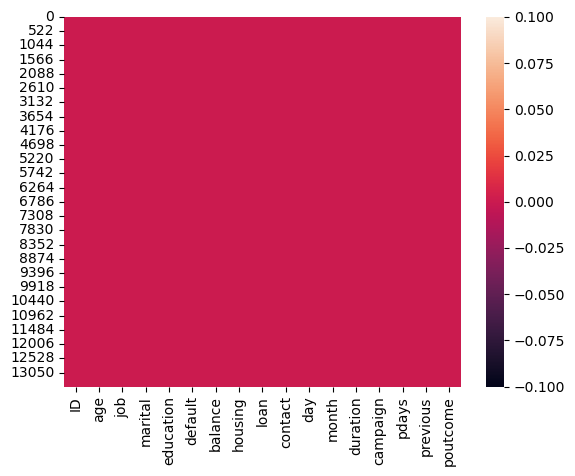

In [152]:
#Checking null value using heatmap in our test dataset
sns.heatmap(test_df.isnull())

In [157]:
#Checking value counts for each column of our test data
for i in test_df.columns:
    print(test_df[i].value_counts())
    print("\n")

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64


32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: 

**Observation:-**

Here ID column we can delete because it will not help us for our prediction.

For default column there is less defaulters that is good for banks.

In [158]:
#Checking unique values for each columns of the test dataset
test_df.nunique().to_frame("Unique value counts")

,Unique value counts
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


**Observation:-**
    
1) Here you can see most for the columns are categorical columns.

2) Also we can see there is ID column is present and each one of it's value is unique and it can't make any heip to predict the term subscription so we can delete this column.

In [159]:
#Deleting ID column
test_df.drop("ID",axis=1,inplace=True)

In [160]:
test_df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown


**Here you can see ID column is deleted.**

In [161]:
#Checking discription of the test dataset
test_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


**Observation:-**

Here we can see those columns which has numerical data we can see their statstical view.

There is a huge difference between 75% and max for age,balance,day,duration,campaign,pdays,previous these columns so in these columnns outliers may present.

Here age,balance,duration,campaign,pdays and previous columns have greater mean that median(50%) that means these columns are right skewed.

Only day column is left skewed.

# Checking for outliers:-

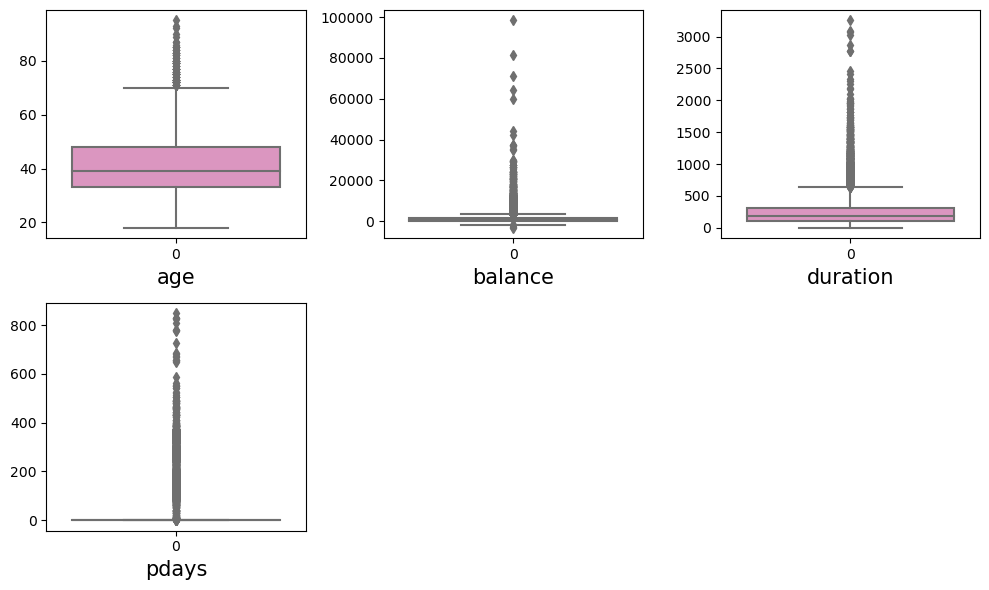

In [162]:
#Some columns I am avoiding to take because those have categorical data
values1=test_df[["age","balance","duration","pdays"]]
plt.figure(figsize=(10,6),facecolor="white")
plot_number=1
for col in values1:
    if plot_number<=8:
        ax=plt.subplot(2,3,plot_number)
        sns.boxplot(test_df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        
    plot_number+=1
    
plt.tight_layout()
plt.show()

**Observation:-**
    
1) Here we can see "age","balance","duration","pdays" all of them has outliers so we have to remove them.

2) From my previous experience I know less data lost happen when we use zscore compare with IQR method,sso we will take zscore method to take out of the outliers.

3) we can also see pdays column has no box or wiskers to show because this column's data points are too close

# Removing Outliers:-

**Using zscore**

In [163]:
from scipy.stats import zscore
values1=test_df[["age","balance","duration","pdays"]]
z1=np.abs(zscore(values1))
z1

,age,balance,duration,pdays
0,0.838114,0.402389,0.921849,0.418199
1,3.499987,0.463375,0.439963,0.418199
2,0.932421,0.393955,1.616074,0.418199
3,1.519549,0.784508,0.747754,0.418199
4,0.387871,0.669352,0.569789,0.418199
...,...,...,...,...
13559,0.177969,0.426069,0.426644,0.418199
13560,1.236630,0.299239,0.387957,0.418199
13561,0.555195,0.348218,0.473070,0.418199
13562,1.121034,0.290155,0.194517,0.483926


# Finding outliers location

In [164]:
np.where(z1>3)

(array([    1,     9,    14, ..., 13512, 13550, 13563], dtype=int64),
 array([0, 3, 1, ..., 2, 2, 3], dtype=int64))

In [169]:
#Checking outliers using it's location
z1.iloc[1,0]

3.4999869283541534

**You can the the value of 1st row and 0st no. column is 3.49.... that is more than 3 that means it's a outlier.**

# Creating a outlier free dataset

In [171]:
#Removing outliers
new_test_df=test_df[(z1<3).all(axis=1)]
new_test_df.shape

(12522, 16)

In [172]:
#Checking old Dataframe counts with new outliers free test Dataframe
print("Old Dataframe:-",test_df.shape[0])
print("New Dataframe:-",new_test_df.shape[0])
print("The counts of rows we lost due to outliers are:-",test_df.shape[0]-new_test_df.shape[0])

Old Dataframe:- 13564
New Dataframe:- 12522
The counts of rows we lost due to outliers are:- 1042


# Checking Data lost percentage after removing outliers

In [173]:
#Checking the datalost percentage after removing outliers using zscore method
print("Data  lost percentage after removing outliers using zscore method",((test_df.shape[0]-new_test_df.shape[0])/test_df.shape[0])*100)

Data  lost percentage after removing outliers using zscore method 7.682099675611914


**Here you can see 7% data lost we get and it's affordable.**

# Checking for skewness

In [174]:
new_test_df.skew()

age         0.440006
balance     2.470251
day         0.087695
duration    1.581964
campaign    4.951210
pdays       2.595566
previous    8.556120
dtype: float64

**Observation:-**

Here we can see some columns are missing for skewness checking because those have categorical data and we dont need to check categorical column skewness.

Our acceptable skewness range is +0.5 to -0.5 and here you can see balance,duration,campaign,pdays and previous those have skewness value out of our acceptable range so we have to reduce them.

# Reducing Skewness

In [175]:
#Trying to reduce skewness using cube root method
a=new_test_df["balance"]
b=new_test_df["duration"]
c=new_test_df["campaign"]
d=new_test_df["pdays"]
e=new_test_df["previous"]


a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)
d=np.cbrt(d)
e=np.cbrt(e)


print("balance:",a.skew())
print("duration:",b.skew())
print("campaign:",c.skew())
print("pdays:",d.skew())
print("previous:",e.skew())


balance: -0.4156114523383925
duration: 0.2563567501316646
campaign: 1.6282694494686496
pdays: 1.9822164762344243
previous: 2.2940767700898426


**Here we can see balance,duration column's skewness is reduced while using cube root method so I will implement it permanently to this column.**

In [176]:
#Reducing skewness for duration and balance column using cube root method permanently
new_test_df["balance"]=np.cbrt(new_test_df["balance"])
new_test_df["duration"]=np.cbrt(new_test_df["duration"])

In [177]:
#Checking skewness again
new_test_df.skew()

age         0.440006
balance    -0.415611
day         0.087695
duration    0.256357
campaign    4.951210
pdays       2.595566
previous    8.556120
dtype: float64

**we can see balance,duration column's skewness is reduced permanently.So now I have to remove skewness for campaign,pdays and previous. Now I will use PowerTransformation to reduce skewness for these columns**

In [178]:
#using PowerTransformer to reduce the skewness
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

c=new_test_df["campaign"]
d=new_test_df["pdays"]
e=new_test_df["previous"]

#Reshaping the columns because power transformar need 2d array instead 1d
c_reshape=c.values.reshape(-1,1)
d_reshape=d.values.reshape(-1,1)
e_reshape=e.values.reshape(-1,1)


#Now fitting the Transformer
c_transform=pt.fit_transform(c_reshape)
d_transform=pt.fit_transform(d_reshape)
e_transform=pt.fit_transform(e_reshape)

#Convert the transformed array back to the DataFrame
c=pd.DataFrame(c_transform)
d=pd.DataFrame(d_transform)
e=pd.DataFrame(e_transform)


print("campaign skewness:",c.skew())
print("pdays skewness:",d.skew())
print("previous skewness:",e.skew())


campaign skewness: 0    0.229725
dtype: float64
pdays skewness: 0    1.881752
dtype: float64
previous skewness: 0    1.881345
dtype: float64


**So you can see campaign columns skewness reduced by using PowerTransformer ,So I want to make this change permanently.**

In [179]:
#using PowerTransformer to reduce the skewness of campaign 
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

campaign_reshape=new_test_df["campaign"].values.reshape(-1,1)

#Now fitting the Transformer
campaign_transform=pt.fit_transform(campaign_reshape)

#Converting transformed array back to the DataFrame
new_test_df["campaign"]=pd.DataFrame(campaign_transform)

In [180]:
#Checking skewness again
new_test_df.skew()

age         0.440006
balance    -0.415611
day         0.087695
duration    0.256357
campaign    0.226374
pdays       2.595566
previous    8.556120
dtype: float64

**You can see campaign column's skewness is reduced.**

In [181]:
new_test_df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign     964
pdays          0
previous       0
poutcome       0
dtype: int64

**So you can see after appliing PowerTransformer there are 964 null value is present so I have to fill these Null values.**

In [182]:
new_test_df["campaign"].fillna(new_test_df["campaign"].median(),inplace=True)

In [183]:
new_test_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

**Now you can see all null values that are present earlier in campaign column is filled now.**

In [184]:
#Trying to reduce skewness using log normal distribution

d=new_test_df["pdays"]
e=new_test_df["previous"]

d=np.log(d)
e=np.log(e)


print("pdays:",d.skew())
print("previous:",e.skew())

pdays: -3.0875595678088508
previous: nan


**So you can see log normal distribution is not working.Now I will try log + 1 method.**

In [185]:
#Trying to reduce skewness using log+1

d=new_test_df["pdays"]
e=new_test_df["previous"]

d=np.log1p(d)
e=np.log1p(e)


print("pdays:",d.skew())
print("previous:",e.skew())

pdays: nan
previous: 2.7605661138554956


**So you can see log +1 distribution is also not working.Now I will try sqrt method.**

In [186]:
#Trying to reduce skewness using sqrt

d=new_test_df["pdays"]
e=new_test_df["previous"]

d=np.sqrt(d)
e=np.sqrt(e)


print("pdays:",d.skew())
print("previous:",e.skew())

pdays: -0.6549395793806738
previous: 2.956271963958375


**Still it would not work.Lets try boxcox.**

In [187]:
#Trying to reduce skewness using boxcox
from scipy.stats import boxcox
try:
    d=new_test_df["pdays"]
    e=new_test_df["previous"]
    d=boxcox(d)
    e=boxcox(e)
    print("pdays:",d.skew())
    print("previous:",e.skew())
    
except ValueError:
    print("Data must be positive")

Data must be positive


It would not work because data have to be positive.

**Observation:-**

So using all tranformation techniques like log,log1p,PowerTransformer,sqrt,cbrt,boxcox we can not reduce the skewness value of "pdays" and "previous" column so I have to consider this skewness values are their threshold and we have to accept it.

# Checking Data distribution again

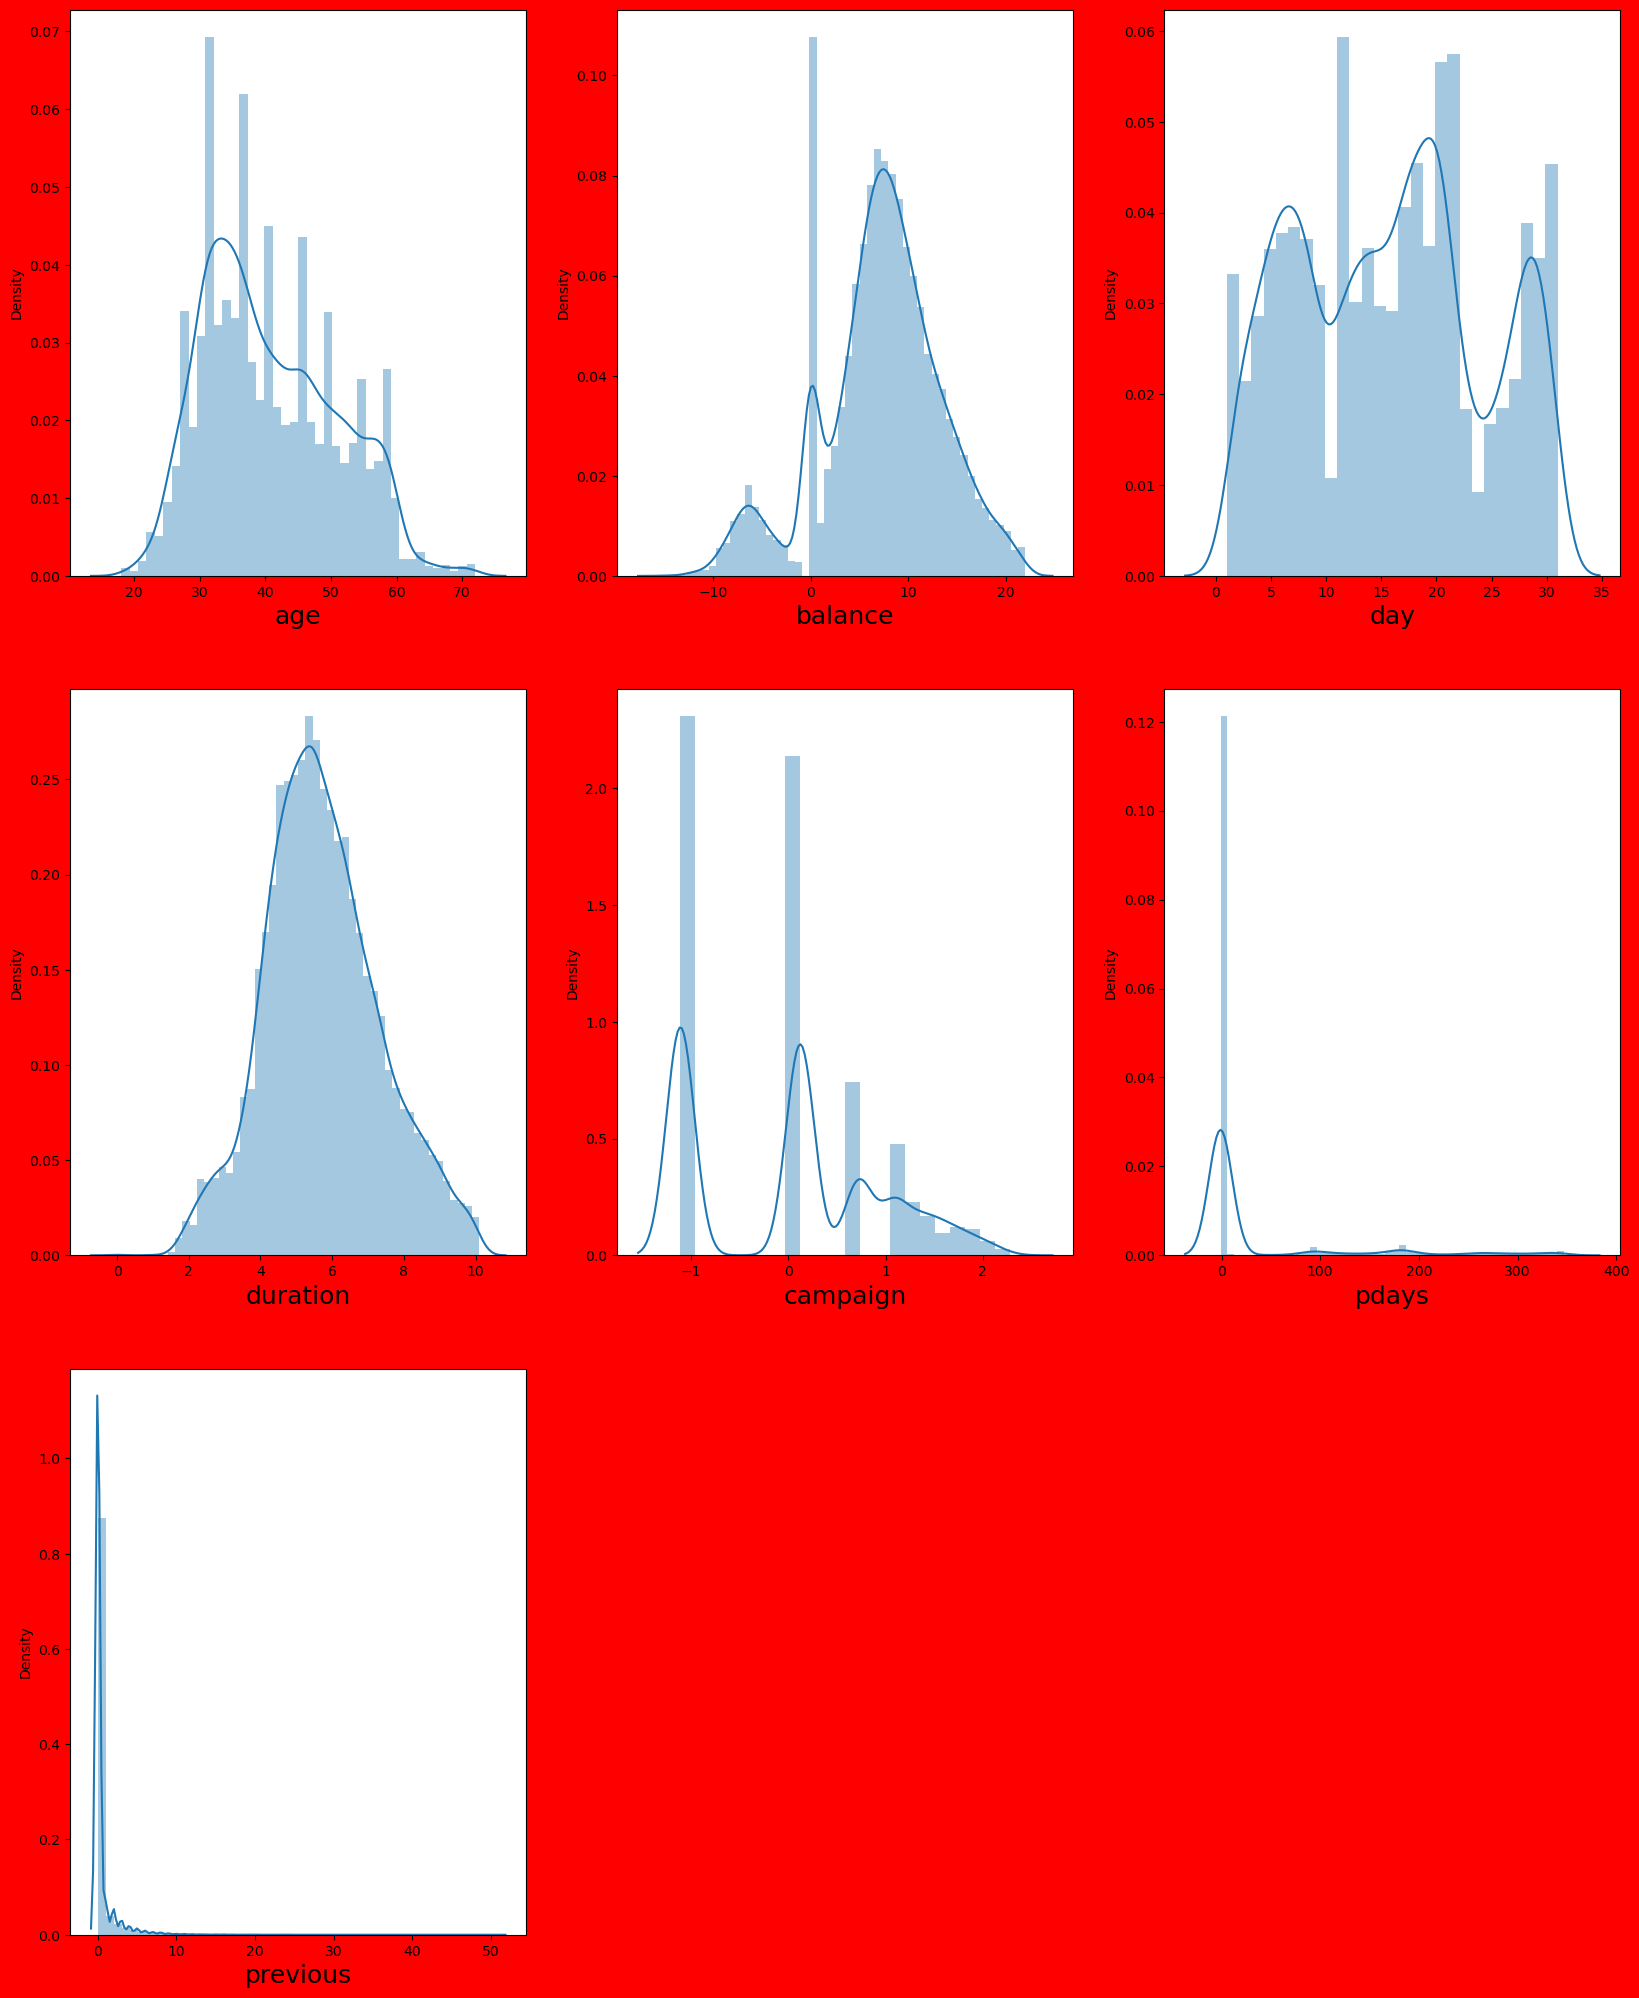

<Figure size 640x480 with 0 Axes>

In [188]:
plt .figure(figsize=(20,25),facecolor="r")
plot=1

for i in new_test_df.columns:
    if plot<14:
        if new_test_df[i].dtypes=="object":
            continue
        plt.subplot(3,3,plot)
        sns.distplot(new_test_df[i])
        plt.xlabel(i,fontsize=18)
        
    plot+=1
    
plt.show()
plt.tight_layout()

**Here you can except age column most of the columns data are normally distributed.**

# Encoding categorical columns

In [189]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

for col in new_test_df.columns:
    if new_test_df[col].dtypes=="object":
        new_test_df[col]=LE.fit_transform(new_test_df[col])

In [190]:
new_test_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,4.904868,1,0,0,15,8,2.714418,1.474815,-1,0,3
2,31,6,2,2,0,5.241483,1,0,2,16,8,8.776383,0.122514,-1,0,3


**Here you can see all my categorical columns are converted into numeric column.**

# Checking correlation between all columns

In [191]:
new_test_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.028856,-0.402236,-0.116355,-0.021682,0.091991,-0.167249,-0.006949,0.028122,-0.010276,-0.046675,-0.014145,0.006956,-0.017800,-0.015545,0.005850
job,-0.028856,1.000000,0.048621,0.156424,-0.015130,0.016963,-0.124302,-0.018834,-0.094068,0.023708,-0.100822,0.009365,0.015794,-0.011540,0.009096,0.003626
marital,-0.402236,0.048621,1.000000,0.112478,0.001114,0.029398,-0.017166,-0.059210,-0.038909,0.005057,-0.017381,0.002076,-0.005614,0.014906,0.026282,-0.011905
education,-0.116355,0.156424,0.112478,1.000000,-0.021421,0.052661,-0.082017,-0.057690,-0.113573,0.035402,-0.059479,-0.001259,0.006530,0.010646,0.030652,-0.031187
default,-0.021682,-0.015130,0.001114,-0.021421,1.000000,-0.190643,0.007107,0.062977,0.019709,0.006165,0.030864,-0.008035,-0.005323,-0.033566,-0.025443,0.034684
balance,0.091991,0.016963,0.029398,0.052661,-0.190643,1.000000,-0.080778,-0.146167,-0.044817,-0.009845,-0.001541,0.035147,0.013225,0.053970,0.062093,-0.077357
housing,-0.167249,-0.124302,-0.017166,-0.082017,0.007107,-0.080778,1.000000,0.050290,0.188970,-0.028574,0.275884,0.011355,-0.008660,0.116466,0.034062,-0.090943
loan,-0.006949,-0.018834,-0.059210,-0.057690,0.062977,-0.146167,0.050290,1.000000,-0.017800,0.003320,0.020610,-0.012346,0.005690,-0.015947,-0.010339,0.016514
contact,0.028122,-0.094068,-0.038909,-0.113573,0.019709,-0.044817,0.188970,-0.017800,1.000000,-0.036558,0.383186,-0.051785,-0.009432,-0.249277,-0.168727,0.260660
day,-0.010276,0.023708,0.005057,0.035402,0.006165,-0.009845,-0.028574,0.003320,-0.036558,1.000000,-0.015257,-0.045578,0.013198,-0.093868,-0.053480,0.083073


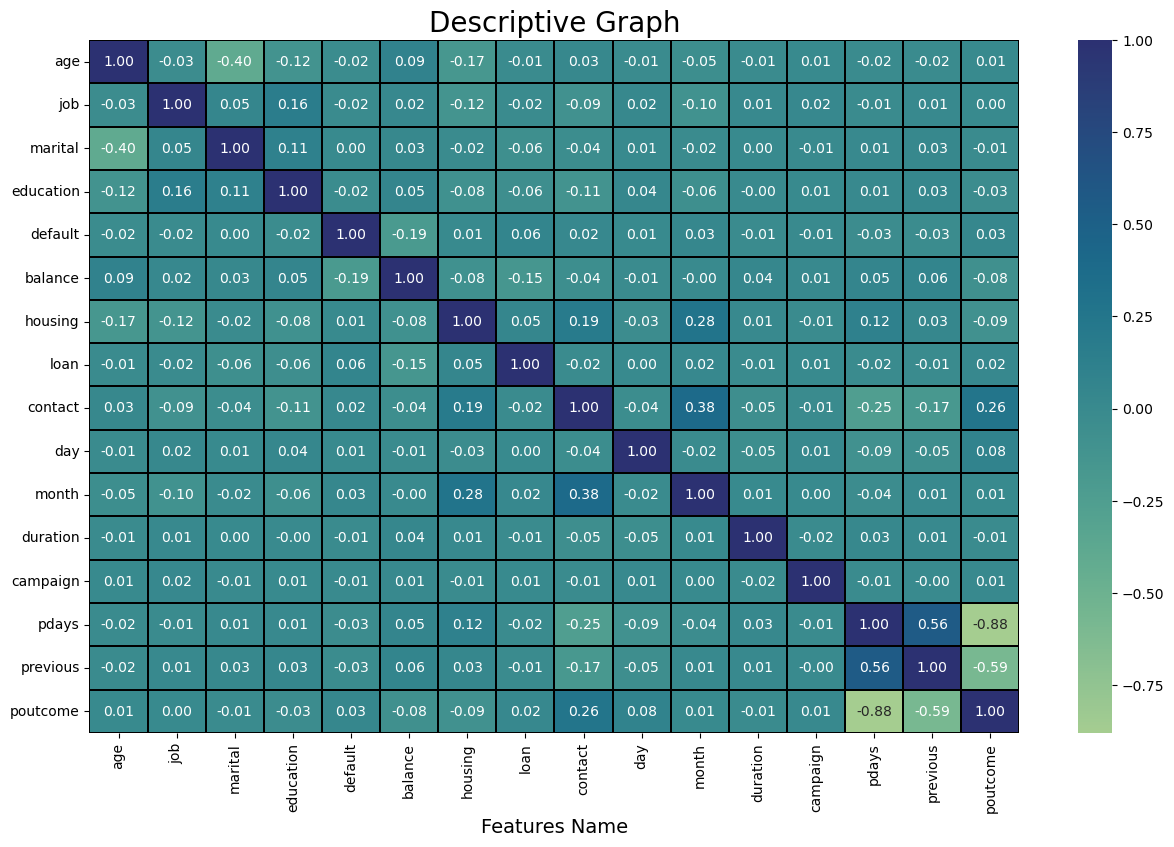

In [192]:
#Visualy checking correlation between all the columns
plt.figure(figsize=(15,9))
sns.heatmap(new_test_df.corr(),cmap="crest",fmt="0.2f",linewidth="0.2",linecolor="black",annot=True)
plt.xlabel("Features Name",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

**Observation:-**

1) pdays and poutcome has highly negative correlation.

2) rest of the columns have slightly negative or positive correlation with each other.

# Now I am going to load my model and predict my test dataset:

In [194]:
#Loadind the model
model=joblib.load("Bank.pkl")
#Passing my Test dataset to my model for prediction
prediction=model.predict(new_test_df)
prediction

array([1, 1, 1, ..., 1, 1, 1])

**Here you can see my model is working.**

# END